<a href="https://colab.research.google.com/github/jaimepineros122/An-lisis-Abandono-Escolar-/blob/main/Proyecto_deserci%C3%B3n_estudiantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Introducción </h1>
 <h3>Proyecto</h3>

El conjunto de datos utilizados parte del estudio realizado por una institución de educación superior en las que se presenta la información relacionada con los estudiantes de diferentes programas de educación superior y demás variables relacionadas con su información personal y aquellas orientadas a la historia académica de los estudiantes que propician el abando o éxito de su carrera profesional.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

df=pd.read_csv("/content/drive/MyDrive/proyecto modelar /student_data.csv",delimiter=';')
df.head(5)

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from google.colab import drive
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

# Ruta archivo csv
ruta_archivo = "/content/student_data.csv"

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(ruta_archivo,delimiter=';')
df.head(5)

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


***Marital status:***  Variable categórica que indica el estado civil de los estudiantes.

***Course*** Variable categórica que representa el programa académico elegido.

***evening attendance*** Variable binaria relacionada con la asistencia del estudiante a clases diurnas o nocturnas.

***Previous qualification*** Variable categórica que indica la eduación previa del estudiante

***Nationality*** Variable categórica que indica la nacionalidad del estudiante.

***Mother's qualification***Variable categórica que indica el nivel de educación de la madre del estudiante.


***Father's qualification*** Variable categórica que indica el nivel de educación del padre del estudiante.

***Mother's occupation*** Variable categórica relacionada con la ocupación de la madre del estudiante.


***Father's occupation*** Variable categórica relacionada con la ocupación del padre del estudiante.


***Displaced*** Variable binaria que indica si el individuo ha sido desplazado.

***Educational special needs*** Variable binaria que indica si el individuo necesita educacion especiaL.

***Debtor*** Variable binaria que muestra si el estudiante es  deudor o no.

***Tuition fees up to date*** Variable binaria que indica si el estudiante tiene los pagos de la matrículas al día.

***Gender*** Variable binaria que indica el género del individuo.

***Scholarship holder*** Variable binaria que representa si el individuo posee una beca.

***Age at enrollment*** Variable numérica que indica la edad del individuo en el momento de la inscripción.

***International*** Variable binaria que representa si el individuo es internacional

***Curricular units 1st sem (enrolled)***  Variable numérica que indica el número de unidades curriculares matriculadas en el 1er semestre.

***Curricular units 1st sem (evaluations)*** Variable numérica que indica el número de evaluaciones de las unidades curriculares en el 1er semestre.

***Curricular units 1st sem (approved)*** Variable numérica que indica el número de unidades curriculares aprobadas en el 1er semestre.

***Curricular units 2nd sem (enrolled)*** Variable numérica que indica el número de unidades curriculares matriculadas en el 2do semestre.

***Curricular units 2nd sem (evaluations)*** Variable numérica que indica el número de evaluaciones de las unidades curriculares en el 2do semestre.

***Curricular units 2nd sem (approved)*** Variable numérica que indica el número de unidades curriculares aprobadas en el 2do semestre.

***Inflation rate*** Variable numérica que representa la tasa de desempleo(Tasa de desempleo (%)).

***GDP*** Variable numérica que indica el producto interno bruto.

***output*** Variable categórica que indica la situación del estudiante.


|Categórica|Numérica|Binaria|
|-|-|-|
|Marital status|Inflation rate|evening attendance|
|Previous qualification|Age at enrollment|Displaced
|Nationality|Curricular units 1st sem (credited)|Educational special needs|
|Course|Curricular units 1st sem (enrolled)|Debtor|
|Mother's occupation|Curricular units 1st sem (evaluations)|Tuition fees up to date|
|Father's occupation|Curricular units 1st sem (approved)|International|
|Output|Curricular units 1st sem (without evaluations)|Scholarship holder|
|Mother's qualification|Curricular units 2nd sem (credited)|||
|Father's qualification|Curricular units 2nd sem (enrolled)||
|Application mode|Curricular units 2nd sem (evaluations)||
|Application order|Curricular units 2nd sem (approved)||
|Gender|Curricular units 2nd sem (grade)||
||Curricular units 2nd sem (without evaluations)||
||Curricular units 1st sem (grade)||
||Unemployment rate||
||GDP||



(1 - Enseñanza secundaria - 12º año de escolaridad o Equiv. 2 - Enseñanza superior - Licenciatura 3 - Enseñanza superior - Grado 4 - Enseñanza superior - Máster 5 - Enseñanza superior - Doctorado 6 - Frecuencia de la enseñanza superior 7 - 12º año de escolaridad - No completado 8 - 11º año de escolaridad - No completado 9 - 7º año (Antiguo) 10 - Otro - 11º año de escolaridad 11 - 10º año de escolaridad 12 - Curso general de comercio 13 - Enseñanza básica 3er ciclo (9º/10º/11º año) o Equiv. 14 - Curso técnico-profesional 15 - 7º año de escolarización 16 - 2º ciclo de bachillerato general 17 - 9º año de escolarización - No completado 18 - 8º año de escolarización 19 - Desconocido 20 - No sabe leer ni escribir 21 - Sabe leer sin tener 4º año de escolarización 22 - Educación básica 1er ciclo (4º/5º año) o equiv. 23 - Enseñanza básica 2º ciclo (6º/7º/8º año) o equiv. 24 - Curso de especialización tecnológica 25 - Enseñanza superior - Licenciatura (1º ciclo) 26 - Curso de estudios superiores especializados 27 - Curso técnico superior profesional 28 - Enseñanza superior - Máster (2º ciclo) 29 - Enseñanza superior - Doctorado (3º ciclo))

**<h2>Descripción de variables </h2>**

In [ ]:
def evening_attendance(var):
    return 'Día' if var==1 else 'Noche'

def displaced(var_d):
    return 'Si' if var_d==1 else 'No'

def debtor(var_de):
    return 'Si' if var_de==1 else 'No'

def T_fees_up_to_date(var_t):
    return 'Si' if var_t==1 else 'No'

def gender(var_g):
    return 'Hombre' if var_g==1 else 'Mujer'

def scholarship_holder(var_s):
    return 'Si' if var_s==1 else 'No'

def international(var_i):
    return 'Si' if var_i==1 else 'No'

def educational_special(var_i):
    return 'Si' if var_i==1 else 'No'

def course(var_c):
    if var_c==1 or var_c==2 or var_c==7:
        return 'Tecnologías e ingeniería'
    if var_c==3 or var_c==10:
        return 'Servicio social'
    if var_c==4:
        return 'Agronomía'
    if var_c==5 or var_c==14 or var_c==15:
        return 'Publicidad y comunicación'
    if var_c==6 or var_c==12 or var_c==13:
        return 'Ciencias de la salud'
    if var_c==8:
        return 'Equinocultura'
    if var_c==9 or var_c==17:
        return 'Gestión'
    if var_c==11:
        return 'Turismo'
    if var_c==16:
        return 'Educación'

def  Mother_qua(var_Qua):
    if  var_Qua==1 :
        return 'Educacion Secundaria'
    if var_Qua==2 or var_Qua==3 or var_Qua==4 or var_Qua==5 or var_Qua==6:
        return 'Educacion Superior'
    if var_Qua==7 or var_Qua==8 or var_Qua==9 or var_Qua==11 or var_Qua==13 or var_Qua==15 or var_Qua==16 or var_Qua==17 or var_Qua==18 or var_Qua==21 or var_Qua==22 or var_Qua==23:
        return 'Educacion Secundaria sin completar'
    if var_Qua==10 or var_Qua==19 or var_Qua==20:
        return 'Sin educacion'
    if var_Qua==12 or var_Qua==14 or var_Qua==24 or var_Qua==25 or var_Qua==26 or var_Qua==27 or var_Qua==28 or var_Qua==29:
        return 'Profesional'

def  Mother_occu(var_occu):
    if  var_occu==1:
        return 'Estudiante'
    if var_occu==2:
        return 'Representantes del gobierno'
    if var_occu==17 or var_occu==18 or var_occu==19 or var_occu==5 or var_occu==22 or var_occu==9:
        return 'Técnicos'
    if var_occu==10 or var_occu==24:
        return 'Informales'
    if var_occu==13 or var_occu==12:
        return 'Desempleada'
    if var_occu==8 or var_occu==6 or var_occu==7 or var_occu==23 or var_occu==25 or var_occu==26 or var_occu==27  or var_occu==28 or var_occu==29 or var_occu==30 or var_occu==31 or var_occu==32 :
        return 'trabajadores de multiples servicios'
    if var_occu==4 or var_occu==11 or var_occu==14 or var_occu==15 or var_occu==21:
        return 'Profesionales'
    if var_occu==3 or var_occu==16 or var_occu==20:
        return 'Especialistas'

def Pather_qua(var_Pqua):
    if var_Pqua==2 or var_Pqua==3 or var_Pqua==4 or var_Pqua==5 or var_Pqua==6 or var_Pqua==30 or var_Pqua==33 or var_Pqua==34:
        return 'Educacion Superior'
    if var_Pqua==1 or var_Pqua==15:
        return 'Educacion Secundaria'
    if var_Pqua==7 or var_Pqua==8 or var_Pqua==9 or var_Pqua==10 or var_Pqua==11 or var_Pqua==12 or var_Pqua==14 or var_Pqua==17 or var_Pqua==18 or var_Pqua==19 or var_Pqua==20 or var_Pqua==21 or var_Pqua==27 or var_Pqua==28:
        return 'Educacion Secundaria sin completar'
    if var_Pqua==16 or var_Pqua==24 or var_Pqua==25 or var_Pqua==26:
        return 'Sin educacion'
    if var_Pqua==13 or var_Pqua==22 or var_Pqua==23 or var_Pqua==29:
        return 'Profesional'

def Pather_occ(var_Pocc):
    if var_Pocc== 1:
        return 'Estudiante'
    if var_Pocc== 2 :
        return 'Representantes del gobierno'
    if var_Pocc== 4 or var_Pocc==23 or var_Pocc==24 or var_Pocc==25 or var_Pocc==26:
        return 'Tecnico'
    if var_Pocc== 5 or var_Pocc==11 or var_Pocc==14 or var_Pocc==15 or var_Pocc==16 or var_Pocc==17 or var_Pocc==18 or var_Pocc==20 or var_Pocc==21 or var_Pocc==27 or var_Pocc==28 or var_Pocc==29 or var_Pocc==40:
        return 'Profesional'
    if var_Pocc== 2 or var_Pocc==10  or var_Pocc==31 or var_Pocc==32 or var_Pocc==33 or var_Pocc==34 or var_Pocc==35 or var_Pocc==42 or var_Pocc==46:
        return 'informal'
    if var_Pocc== 6 or var_Pocc== 7 or var_Pocc==8 or var_Pocc==9 or var_Pocc==30 or var_Pocc==36 or var_Pocc==37 or var_Pocc==38 or var_Pocc==39 or var_Pocc==41 or var_Pocc==43 or var_Pocc==44 or var_Pocc==45:
        return 'trabajadores de multiples servicios'
    if var_Pocc== 3 or var_Pocc==19 or var_Pocc==22:
        return 'Especialistas'
    if var_Pocc==13 or var_Pocc==12:
        return 'Desempleada o otra situacion'


def previous(var_pr):
    if var_pr==1 or var_pr==9 or var_pr==10 or var_pr==12 or var_pr==13 or var_pr==14:
        return 'Educación secundaria'
    if var_pr==2 or var_pr==3 or var_pr==4 or var_pr==5 or var_pr==6 or var_pr==15 or var_pr==17:
        return 'Educación superior'
    if var_pr==7 or var_pr==8 or var_pr==11:
        return 'Educación secundaria no completada'
    if var_pr==16:
        return 'Curso técnico'


def marital(var_m):
    if var_m==1:
        return 'Soltero'
    if var_m==2:
        return 'Casado'
    if var_m==3:
        return 'Viudo'
    if var_m==4 or var_m==6:
        return 'Divorciado'
    if var_m==5:
        return 'Unión libre'


df['evening attendance']=df['evening attendance'].apply(evening_attendance)
df['Displaced']=df['Displaced'].apply(displaced)
df['Debtor']=df['Debtor'].apply(debtor)
df['Tuition fees up to date']=df['Tuition fees up to date'].apply(T_fees_up_to_date)
df['Gender']=df['Gender'].apply(gender)
df['Scholarship holder']=df['Scholarship holder'].apply(scholarship_holder)
df['International']=df['International'].apply(international)
df['Course']=df['Course'].apply(course)
df['Previous qualification']=df['Previous qualification'].apply(previous)
df['Marital status']=df['Marital status'].apply(marital)
df["Mother's qualification"]=df["Mother's qualification"].apply(Mother_qua)
df["Mother's occupation"]=df["Mother's occupation"].apply(Mother_occu)
df["Father's qualification"]=df["Father's qualification"].apply(Pather_qua)
df["Father's occupation"]=df["Father's occupation"].apply(Pather_occ)
df["Educational special needs"]=df["Educational special needs"].apply(educational_special)
df.head()

#variables de control
filtered_df = df[df["Output"] =="Dropout"]
fil_0= df[df["Curricular units 1st sem (enrolled)"] ==0]
fil_d0= df[df["Curricular units 1st sem (enrolled)"] !=0]
df.head(5)

,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,Soltero,8,5,Tecnologías e ingeniería,Día,Educación secundaria,1,Educacion Secundaria sin completar,Educacion Secundaria sin completar,trabajadores de multiples servicios,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Soltero,6,1,Turismo,Día,Educación secundaria,1,Educacion Secundaria,Educacion Superior,Profesionales,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Soltero,1,5,Publicidad y comunicación,Día,Educación secundaria,1,Educacion Secundaria sin completar,Educacion Secundaria sin completar,Informales,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Soltero,8,2,Publicidad y comunicación,Día,Educación secundaria,1,Educacion Secundaria sin completar,Educacion Secundaria sin completar,trabajadores de multiples servicios,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Casado,12,1,Servicio social,Noche,Educación secundaria,1,Educacion Secundaria sin completar,Educacion Secundaria sin completar,Informales,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**1. Valores nulos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   evening attendance                              4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   object 
 8   Father's qualification                          4421 non-null   object 
 9   Mother's occupation                      

De acuerdo con la información anterior las diferentes variables no presentan valores nulos para el registro de los diferentes estudiantes

**2. Comportamiento de variables numéricas con respecto a la cantidad de unidades matriculadas en primer semestre que son 0**

In [ ]:
numericas=fil_0[['Curricular units 1st sem (enrolled)','Curricular units 1st sem (approved)','Curricular units 1st sem (evaluations)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (evaluations)']]
numericas.describe()

,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (evaluations),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (evaluations)
count,180.0,180.0,180.0,180.0,180.0,180.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


Teniendo en cuenta la anterior información, para algunos estudiantes no se registraron la cantidad de unidades curriculares que cursaron en primer semestre y, por ende, de los demás registros relacionados con la historia académica. Por lo cual, no se van a utilizar en el análisis de las variables numéricas.

**2. Análisis univariado de frecuencia para variables categóricas**

In [ ]:
cuali= fil_d0[['Marital status','Previous qualification',"Mother's qualification", "Mother's occupation","Father's qualification","Father's occupation",'Course','Displaced','Gender','evening attendance','Educational special needs','International','Tuition fees up to date']]


for variables in cuali:
  fig = px.bar(fil_d0.groupby(variables).size(), title="Frecuencia para la variable "+variables, color_discrete_sequence=["#4C78A8"])
  fig.show()

Al observar el gráfico de frecuencia de las variables categóricas lo datos más relevantes:<br>
Al analizar las variables de "Mother's qualification" y "Mother's occupation" se puede observar, que la mayoría de las madres no completaron la educación secundaria pero tienen altos porcentajes de obtener cargos tecnicos e informales siendo estos concentrados de vendedoras, en "Father's qualification" pasa algo similar en la educación igual que con las madres pero en la gráfica de ocupaciones, de los padres se observa como se concentra en trabajadores de múltiples servicios<br>.
Además la tendencia en los estudiantes es que hay más mujeres que hombres estudiando

**3. Análisis univariado variables numéricas**

In [ ]:
numericas_var = fil_d0[['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']]
numericas_var.describe()

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,23.397738,0.740104,6.536522,8.651037,4.906221,11.092129,0.143497,0.564797,6.496466,8.405278,4.623940,10.664098,0.156692,11.560839,1.229076,0.020895
std,7.684054,2.405427,2.161810,3.893594,3.000144,4.410127,0.704788,1.955502,1.819121,3.656824,2.933299,4.865825,0.768947,2.663836,1.377679,2.272994
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19.000000,0.000000,6.000000,7.000000,3.000000,11.250000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,9.400000,0.300000,-1.700000
50%,20.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,25.000000,0.000000,7.000000,10.000000,6.000000,13.428571,0.000000,0.000000,7.000000,10.000000,6.000000,13.416354,0.000000,13.900000,2.600000,1.790000
max,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
numericas=['Age at enrollment','Curricular units 1st sem (enrolled)','Curricular units 1st sem (approved)','Curricular units 1st sem (evaluations)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (evaluations)']
for variable in numericas:
  fig = px.histogram(fil_d0, x=variable, color_discrete_sequence = ["#4C78A8"])
  fig.show()

De acuerdo con la distribución de las variables, se puede mostrar que en la variable 'Age at enrollment' existe una concentración de valores en la edad de los 18 años, al igual que en las variables "Curricular units 1st sem (enrolled)" y "Curricular units 2nd sem (enrolled)"existe una concentración de valores en el rango de 5 a 6 unidades curriculares.

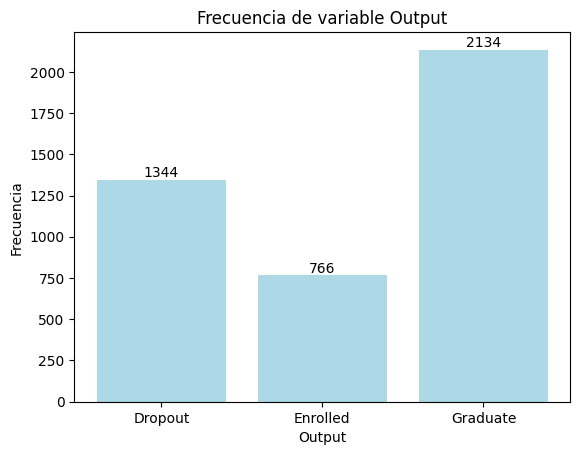

In [ ]:
frecuencias = fil_d0['Output'].value_counts()
frecuencias = frecuencias.sort_index()
figure = plt.bar(frecuencias.index, frecuencias.values, color='lightblue')

for bar in figure:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Etiquetas y titulo
plt.xlabel('Output')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de variable Output')

# Mostrar el diagrama
plt.show()

Respecto a la variable Output, se puede observar que la mayor cantidad de estudiantes se encuentra en el estado graduado, sin embargo, la cantidad de estudiantes que abandonaron sus programas académicos es superior en comparación a los que continúan estudiando.

**<h1> Análisis de los estudiantes de acuerdo con su estado</h1>**

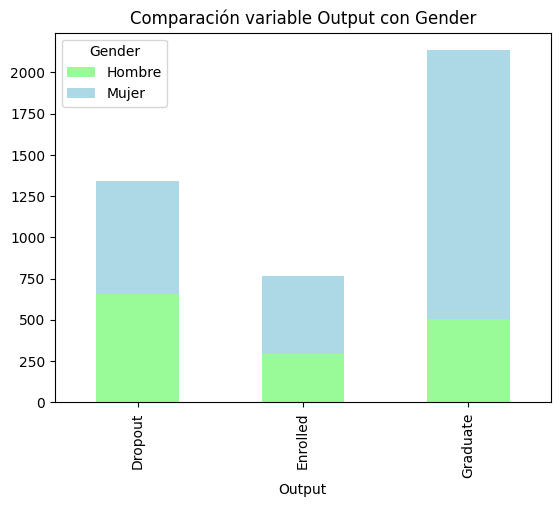

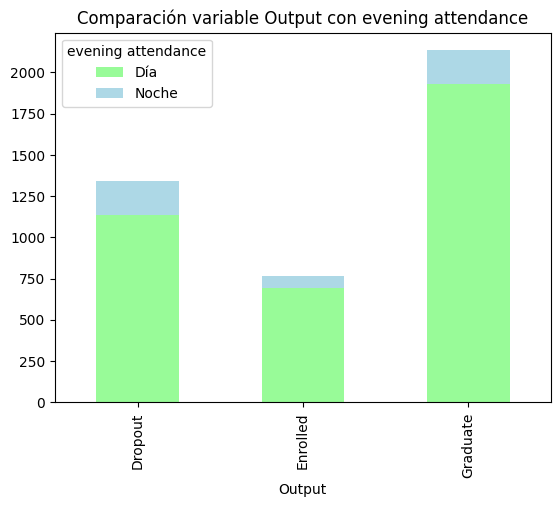

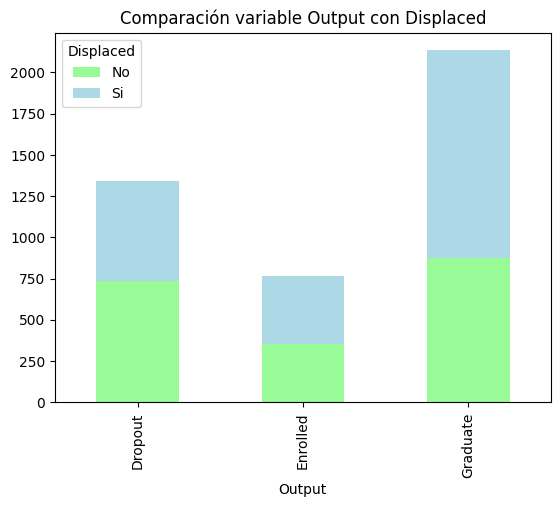

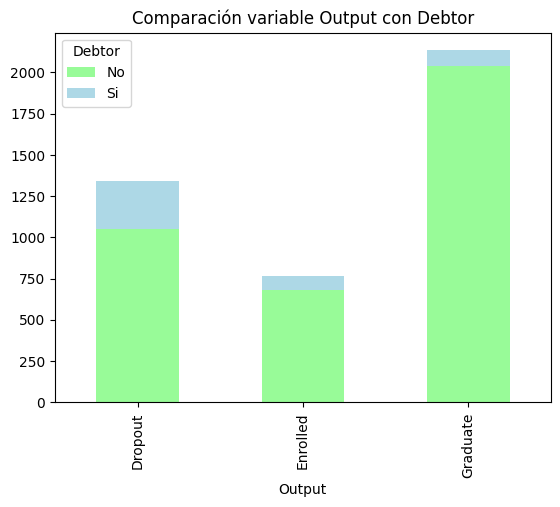

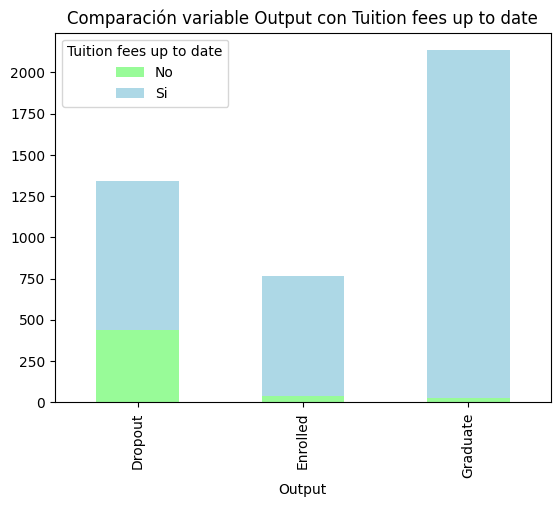

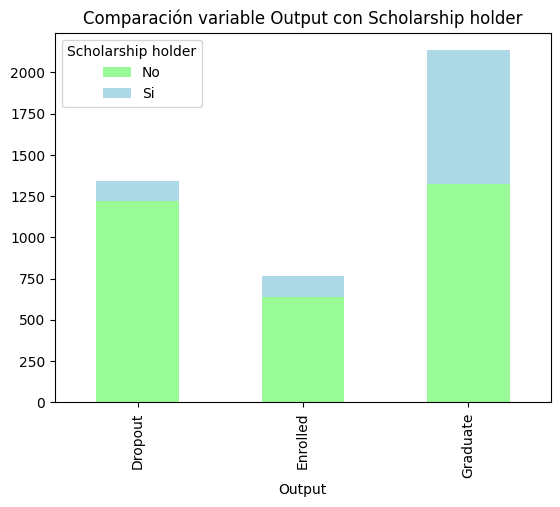

In [ ]:
# Gráfico de barras donde se comparan variables categóricas con la salida dropout
categoricas = ['Gender','evening attendance','Displaced','Debtor','Tuition fees up to date','Scholarship holder']
for variable in categoricas:
  table = (fil_d0.groupby([variable,"Output"]).size()).reset_index()
  table = pd.pivot_table(table, columns = variable, index = 'Output', values = 0)
  table.plot (kind = 'bar', stacked = True, color = ["palegreen","lightblue"])
  plt.title("Comparación variable Output con {}".format(variable))
  plt.show()


De acuerdo con los diagramas de frecuencias relativas, en cuanto al estado de los estudiantes hay una mayor frecuencia de hombres que no continuaron sus estudios académicos y la cantidad de mujeres que salieron es similar a la de hombres, pero inferior a la cantidad de mujeres que se graduaron. Por otro lado, la cantidad de estudiantes que son deudores y no tienen las matrículas al día y, no continuaron con sus estudios, es mayor en comparación con los demás estados.

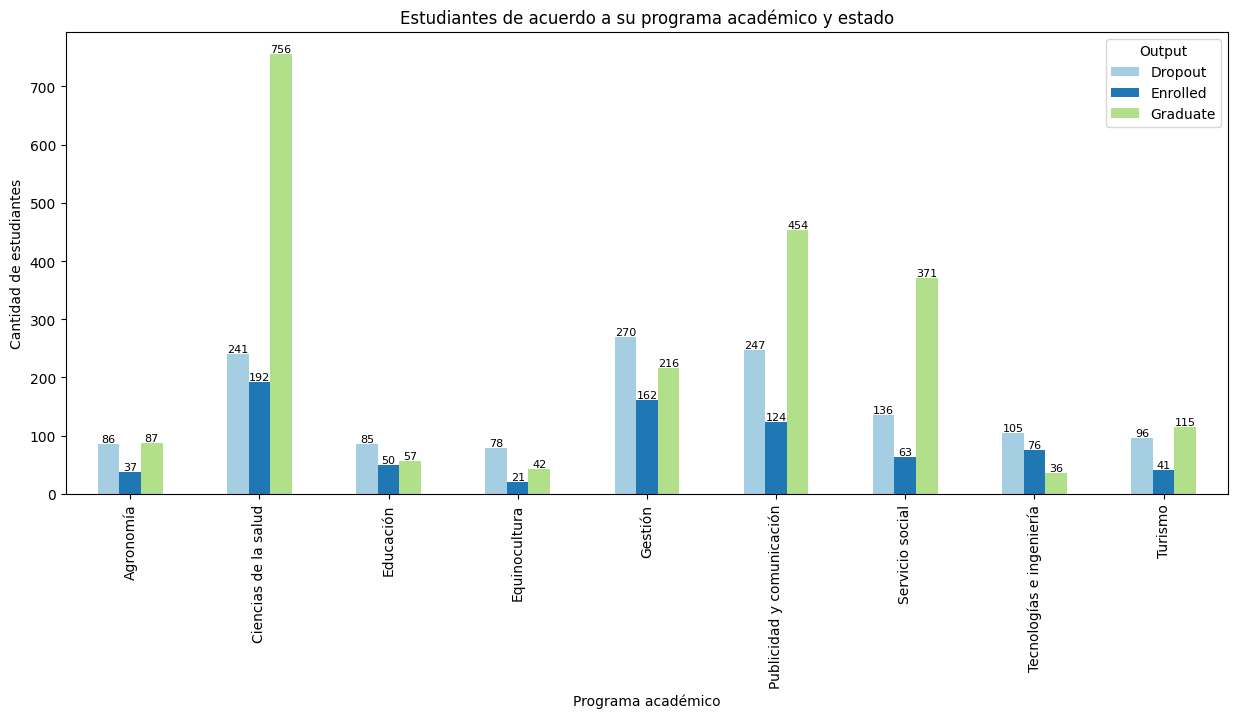

In [ ]:
crosstab_result = pd.crosstab(index=fil_d0["Course"], columns=fil_d0['Output'])

colors = sns.color_palette("Paired", len(crosstab_result.columns))

ax = crosstab_result.plot(kind='bar', color = colors , width=0.5, figsize=(15, 6))

# Añadir etiquetas y título
plt.xlabel("Programa académico")
plt.ylabel("Cantidad de estudiantes")
plt.title("Estudiantes de acuerdo a su programa académico y estado")

ax.grid(False)

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

# Mostrar gráfico
plt.legend(title='Output')
plt.show()

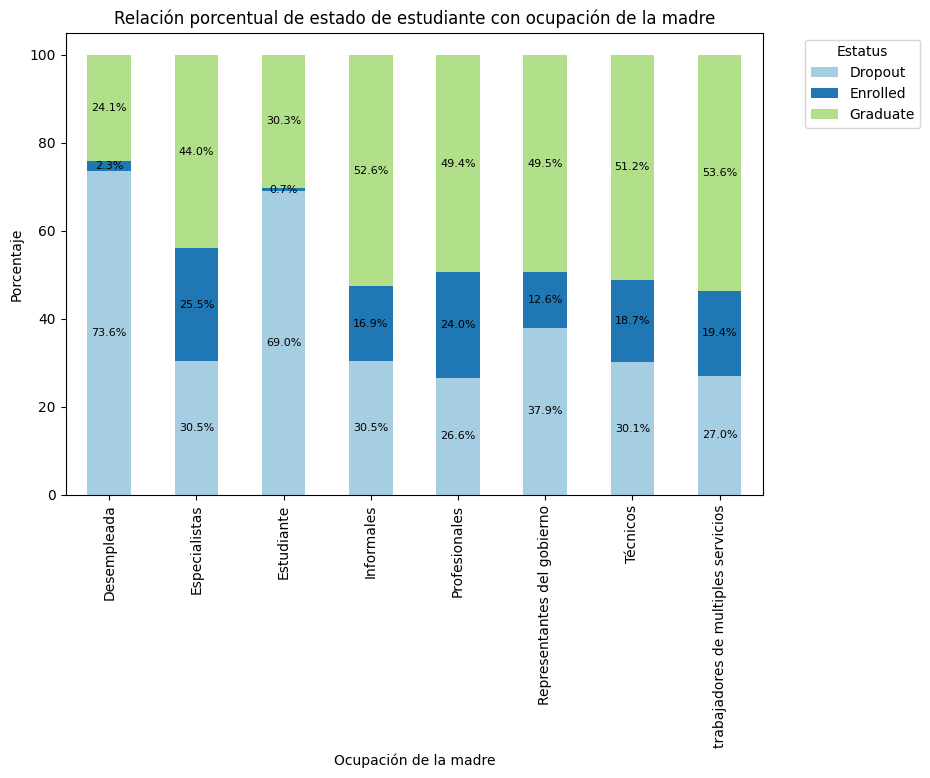

In [ ]:
# Calcular el porcentaje de cada estatus dentro de cada categoría
porcentajes = fil_d0.groupby("Mother's occupation")['Output'].value_counts(normalize=True).unstack()* 100

colors = sns.color_palette("Paired", len(porcentajes))

# Graficar
ax = porcentajes.plot(kind='bar', stacked=True, color = colors, figsize=(9, 6))
ax.set_xlabel('Ocupación de la madre')
ax.set_ylabel('Porcentaje')
ax.set_title('Relación porcentual de estado de estudiante con ocupación de la madre')

# Añadir los porcentajes dentro de cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (x + width / 2, y + height / 2),
                ha='center', va='center', color='black', fontsize = 8)

ax.grid(False)

# Mostrar gráfico
plt.legend(title='Estatus', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

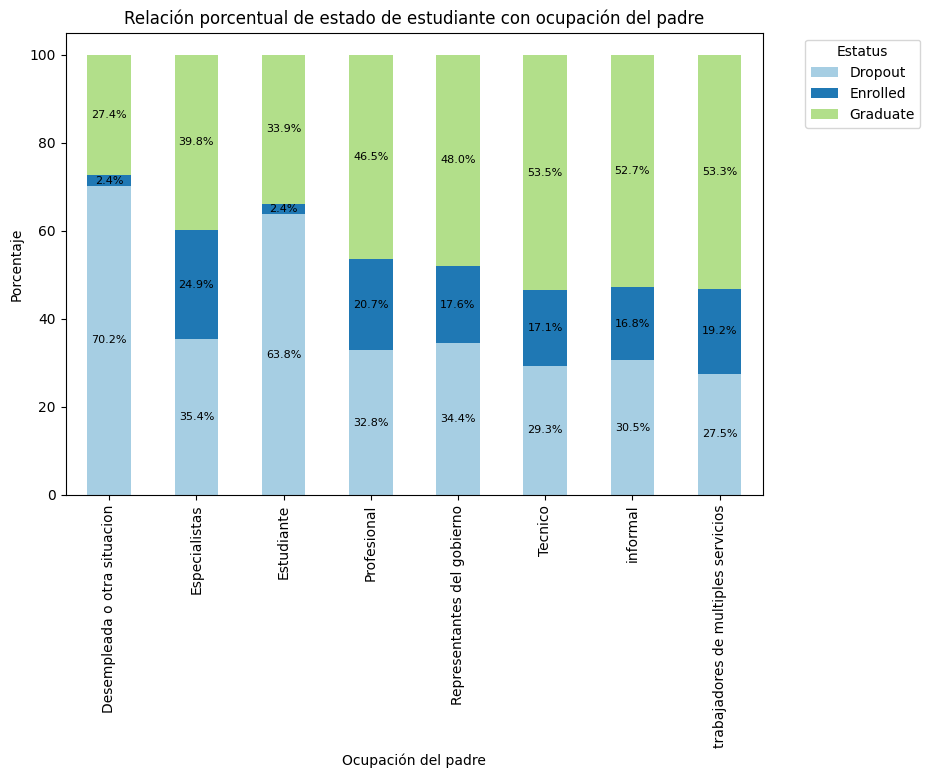

In [ ]:
# Calcular el porcentaje de cada estatus dentro de cada categoría
porcentajes = fil_d0.groupby("Father's occupation")['Output'].value_counts(normalize=True).unstack()* 100

colors = sns.color_palette("Paired", len(porcentajes))

# Graficar
ax = porcentajes.plot(kind='bar', stacked=True, color = colors, figsize=(9, 6))
ax.set_xlabel('Ocupación del padre')
ax.set_ylabel('Porcentaje')
ax.set_title('Relación porcentual de estado de estudiante con ocupación del padre')

# Añadir los porcentajes dentro de cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (x + width / 2, y + height / 2),
                ha='center', va='center', color='black', fontsize = 8)

ax.grid(False)

# Mostrar gráfico
plt.legend(title='Estatus', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**<h1>Muestra en estudio: estudiantes que desertaron de sus programas académicos</h1>**

<h2>Análisis cualitativo</h2>

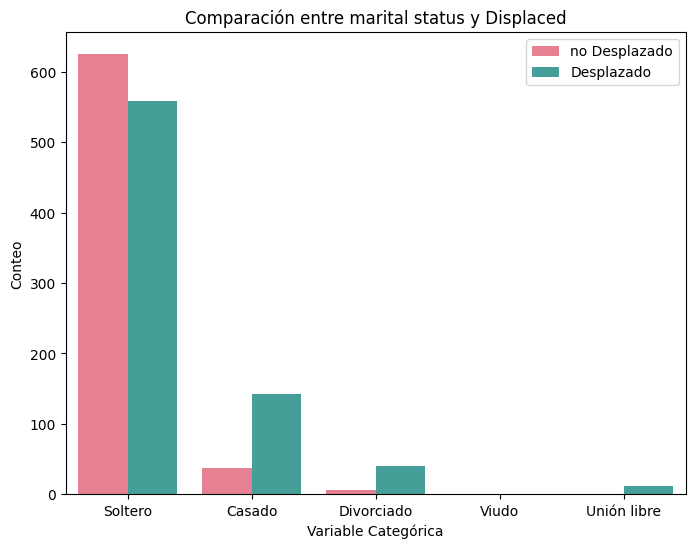

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
datos_mam = filtered_df[(filtered_df["Mother's qualification"]==1)|(filtered_df["Mother's qualification"]==3)|(filtered_df["Mother's qualification"]==22)|(filtered_df["Mother's qualification"]==23)|(filtered_df["Mother's qualification"]==13)]


plt.figure(figsize=(8, 6))
colores = sns.color_palette("husl", 2)
sns.countplot(x="Marital status", hue="Displaced", data=filtered_df, palette=colores)

# Añadir etiquetas y título
plt.xlabel('Variable Categórica')
plt.ylabel('Conteo')
plt.title('Comparación entre marital status y Displaced')
plt.legend(['no Desplazado', 'Desplazado'])
# Mostrar el gráfico
plt.show()

La gráfico muestra que más del 50% de los estudiantes son desplazados, en lo cual predomina este estado en los estudiantes que son casados y divorciados.

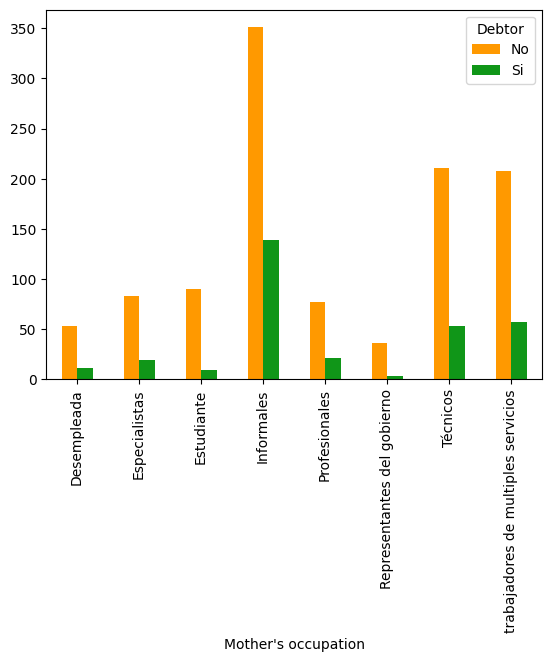

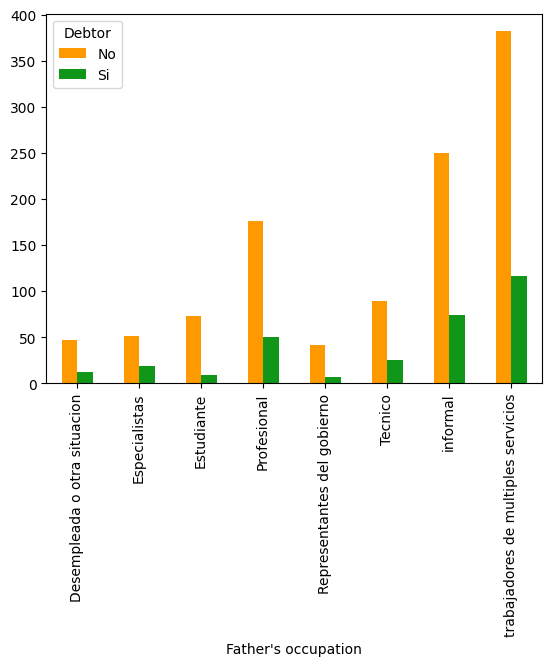

In [ ]:
# Gráfico de barras que compara la ocupacion de los padres con la variable deudor

plot = pd.crosstab(index=filtered_df["Mother's occupation"], columns=filtered_df['Debtor']).plot(kind='bar', color = ["#FF9900","#109618"])
plot = pd.crosstab(index=filtered_df["Father's occupation"], columns=filtered_df['Debtor']).plot(kind='bar', color = ["#FF9900","#109618"])

Al analizar el diagrama anterior se puede concluir, que las profesiones donde las personas trabajan de manera: informal, trabajadores de múltiples servicios y profesionales son los padres, que tienen la tendencia a tener deuda por la educación de los hijos.                                                              

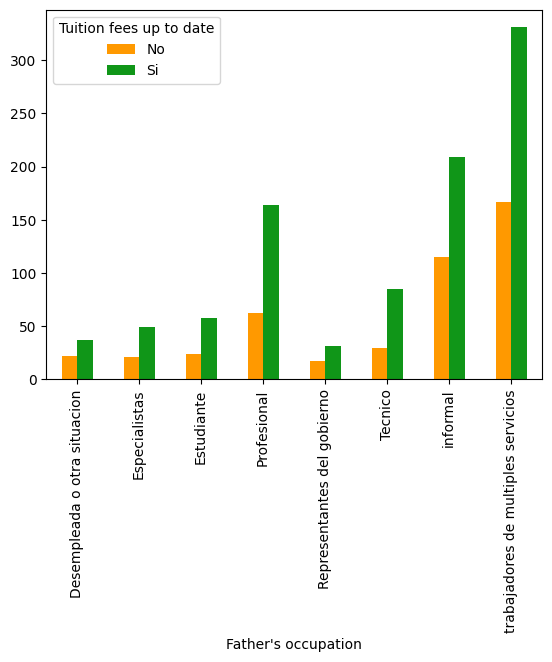

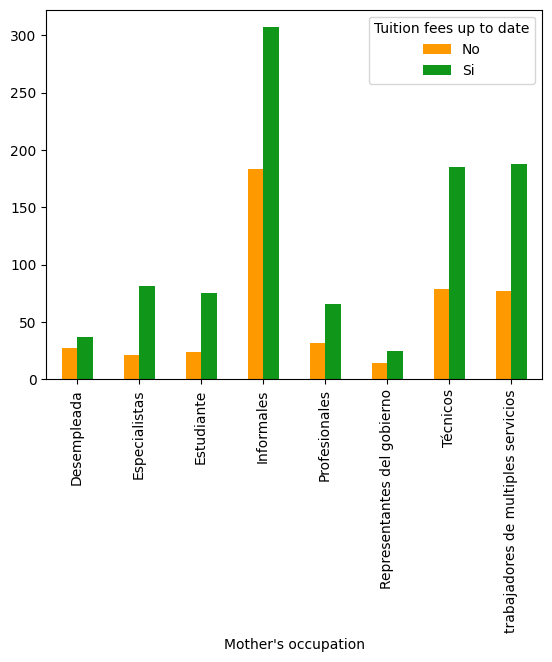

In [ ]:
# Gráfico de barras que compara la ocupacion de los padres con la variable matrículas al día

plot = pd.crosstab(index=filtered_df["Father's occupation"], columns=filtered_df['Tuition fees up to date']).plot(kind='bar', color = ["#FF9900","#109618"])
plot = pd.crosstab(index=filtered_df["Mother's occupation"], columns=filtered_df['Tuition fees up to date']).plot(kind='bar', color = ["#FF9900","#109618"])

 En el gráfico se observa como para los estudiantes que desertaron de la universidad, sus padres tenian problemas para mantenerse al dia con los pagos de la Carrera, siendo un factor para que los estudiantes no continuarán con sus estudios.

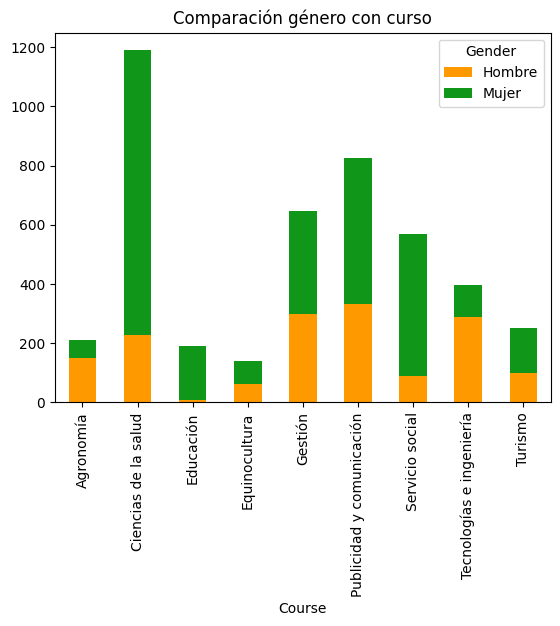

In [ ]:
table = (df.groupby(["Gender","Course"]).size()).reset_index()
table = pd.pivot_table(table, columns = 'Gender', index = 'Course', values = 0)
table.plot (kind = 'bar', stacked = True, color = ["#FF9900","#109618"])
plt.title('Comparación género con curso')
plt.show()

Los programas académicos relacionados con las ciencias de la salud y publicidad y comunicación fueron los más cursados por los estudiantes que no continuaron sus estudios, sin embargo, en cuanto al género un mayor porcentaje de  mujeres en comparación de los hombres optaron por programas de ciencias de la salud, educación y servicio social, del mismo modo, un mayor porcentaje de hombres en comparación de las mujeres optaron por programas de agronomía y tecnologías e ingeniería.

<h2>Análisis variables categóricas con variables numéricas</h2>

In [ ]:
fig = px.histogram(fil_d0, x="Age at enrollment", color="Output", color_discrete_sequence = ["palegreen","lightblue","darkblue"])
fig.show()

En relación con la edad y la variable Output, se puede observar que hay una cantidad mayor de estudiantes que tienen mas de 25 años ubicados en la categoría Dropout en comparación con la categoría Graduate.

- Categoría Dropout

In [ ]:
filtered_drop = fil_d0[fil_d0["Output"] =="Dropout"]

In [ ]:
import plotly.express as px
fig = px.box(filtered_drop, x="Gender", y="Age at enrollment", points="all", color_discrete_sequence=["#72B7B2"])
fig.show()

En cuanto a las edades, la distribución para las mujeres es sesgada a la derecha, lo cual muestra que hay mayor frecuencia de edades pequeñas, el 50% de los datos se encuentran entre el rango de 18 a 29 años. Con respecto a los hombres, existen mayores frecuencias en valores de edades altas.

In [ ]:
import plotly.express as px
fig = px.box(filtered_drop, x="Course", y="Curricular units 1st sem (approved)", points="all", color_discrete_sequence=["#72B7B2"])
fig.show()

En cuanto a los programas académicos, en primer semestre se puede observar que el 25% de los estudiantes en el primer semestre no aprobaron ninguna asignatura con excepción de los que se encontraban en el programa de educación, además los programas que presentan menos cantidad de unidades curriculares aprobadas fueron Tecnologías e ingeniería, servicio social y agronomía.

In [ ]:
import plotly.express as px
fig = px.box(filtered_drop, x="Course", y="Curricular units 2nd sem (approved)", points="all", color_discrete_sequence=["#72B7B2"])
fig.show()

Para el segundo semestre el 25% de los estudiantes no aprobaron las unidades curriculares de los diferentes programas, con excepción de los programas de ciencias de la salud, servicio social y agronomía puesto que el procentaje fue del 50%. Además, los programas presentaron una distribución sesgada a la derecha con excepción de publicidad y comunicación - educación .

<Axes: xlabel='Output', ylabel='Age at enrollment'>

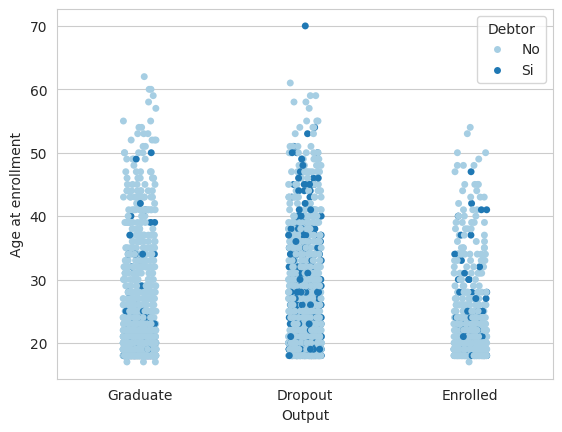

In [ ]:
#Tendencia de la edad del estudiante con la variable deudor y Output
sns.set_style("whitegrid")
sns.stripplot(data=fil_d0, y="Age at enrollment", x="Output", hue="Debtor", palette="Paired")

**<h2>Variables características</h2>**

**Variables Educational special needs - International**

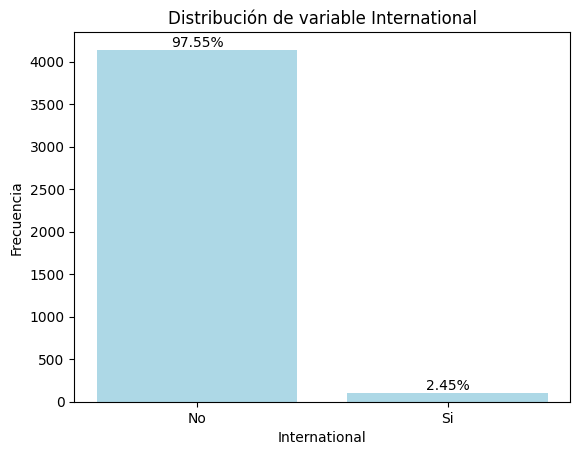

In [ ]:
# Contar las frecuencias de cada categoría
frecuencias = fil_d0['International'].value_counts()

frecuencias = frecuencias.sort_index()

# Gráfico de barras
figure = plt.bar(frecuencias.index, frecuencias.values, color='lightblue')

total = frecuencias.sum()
porcentajes = (frecuencias / total) * 100

for bar, porcentaje in zip(figure, porcentajes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{porcentaje:.2f}%', ha='center', va='bottom')

# Etiquetas y titulo
plt.xlabel('International')
plt.ylabel('Frecuencia')
plt.title('Distribución de variable International')

# Mostrar el diagrama
plt.show()

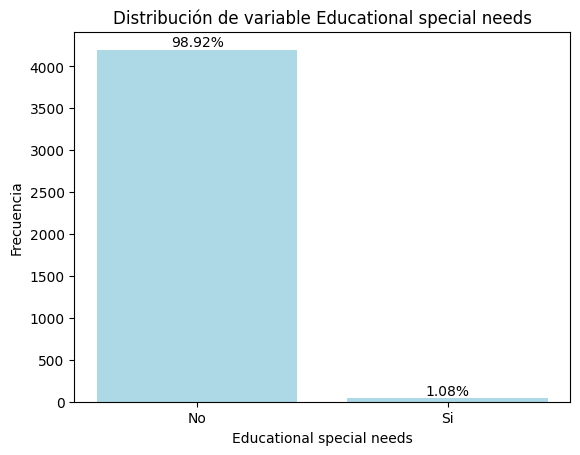

In [ ]:
# Contar las frecuencias de cada categoría
frecuencias = fil_d0['Educational special needs'].value_counts()

frecuencias = frecuencias.sort_index()

# Gráfico de barras
figure = plt.bar(frecuencias.index, frecuencias.values, color='lightblue')

total = frecuencias.sum()
porcentajes = (frecuencias / total) * 100

for bar, porcentaje in zip(figure, porcentajes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{porcentaje:.2f}%', ha='center', va='bottom')

# Etiquetas y titulo
plt.xlabel('Educational special needs')
plt.ylabel('Frecuencia')
plt.title('Distribución de variable Educational special needs')

# Mostrar el diagrama
plt.show()

Para las variables International y Educational Special Needs se puede observar que existe una concentración menor al 10% de datos clasificados en la categoría "Si", por lo que estas variables no se van a utilizar para los modelos.

**Correlación variables categóricas**

In [ ]:
categoricas=df[['Marital status','Previous qualification',"Mother's qualification", "Mother's occupation","Father's qualification","Father's occupation",'Course','Displaced','Gender','evening attendance','Educational special needs','International','Tuition fees up to date','Output']]
columnas = categoricas.columns

pares_significativos = []

for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):
        # Crea una tabla de contingencia
        contingency_table = pd.crosstab(df[columnas[i]], df[columnas[j]])

        # Realiza la prueba de chi-cuadrado
        chi2, p_value, _, _ = chi2_contingency(contingency_table)

        # Verifica si el valor de chi-cuadrado es mayor que 0.5
        if p_value > 0.7:
            pares_significativos.append((columnas[i], columnas[j]))


print("Pares significativos con chi-cuadrado > 0.7:") # imprime la lista de correlaciuones compatibles entre variables categoricas

for par in pares_significativos:
    print(par)

Pares significativos con chi-cuadrado > 0.7:
("Father's occupation", 'Educational special needs')
('Displaced', 'Educational special needs')
('Educational special needs', 'International')
('Educational special needs', 'Output')


La prueba chi-cuadrado da como resultado las posibles relaciones de las variables categóricas, en donde se puede observar que las mayores relaciones se encuentran con las variables Educational special needs e International, por lo que entre las demás variables categóricas no existe una correlación alta.

In [ ]:
from scipy.stats import kruskal

# H0: No hay diferencia entre los grupos
# H1: Hay diferencia entre al menos dos grupos

# Kruskal-Wallis test
kruskal_wallis_test = kruskal(df["Father's qualification"], df['Output'], df["Father's occupation"])

# Imprimir el valor p
p_value = kruskal_wallis_test.pvalue

# Si p_value < 0.05, rechazar H0
if p_value < 0.05:
    print("Hay una diferencia significativa entre los grupos")
else:
    print("No hay una diferencia significativa entre los grupos")


No hay una diferencia significativa entre los grupos


La prueba kruskal para variables ordinales categóricas ayuda a comprobar la relacion entre estas 3 variables categóricas, siendo que el resultado demuestra una alta correlación entre las variables, haciendo que el analisis compruebe que uno de los factores de la deserción de estudiante pueda ser la educación y ocupación del padre.

**Correlación variables numéricas**

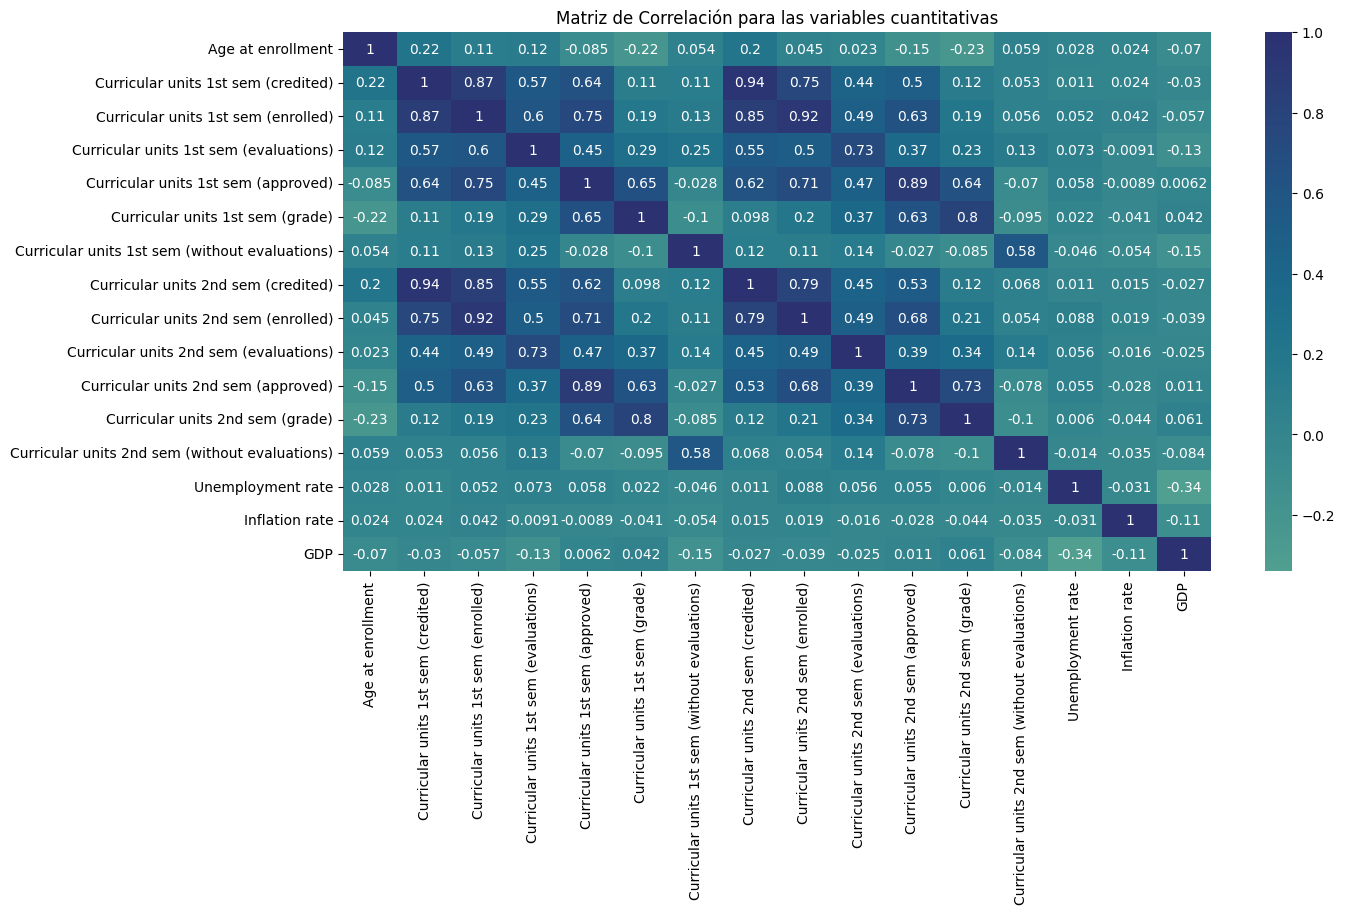

In [ ]:
#Correlación para primer y segundo semestre
curricula_ssem = fil_d0[['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']]
correlation_matrix = curricula_ssem.corr()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", center=0)

plt.title("Matriz de Correlación para las variables cuantitativas")
plt.show()

De acuerdo con la matriz de correlación en cuanto a variables numéricas se van a utilizar las variables Curricular units 1st sem (enrolled), Curricular units 1st sem (approved), puesto que las demás variables relacionadas con el semestre académico están altamente correlacionadas con una de estas dos variables.

**Variables socioeconómicas**

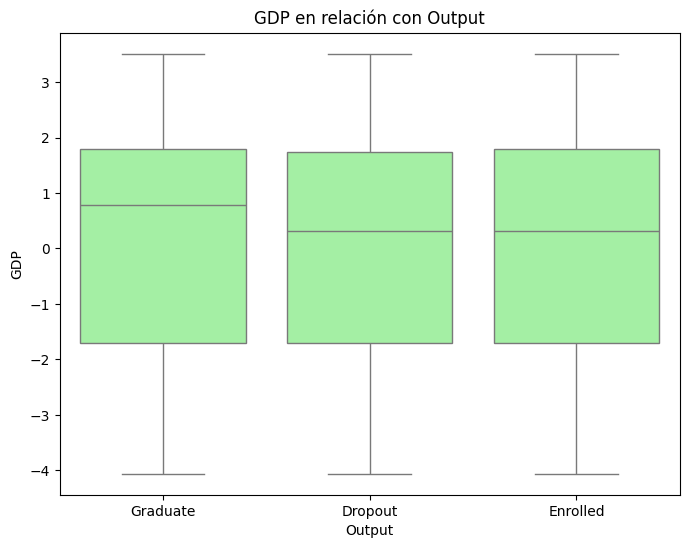

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Output', y='GDP', data=fil_d0, color='palegreen')
plt.title('GDP en relación con Output')
plt.xlabel('Output')
plt.ylabel('GDP')
plt.show()

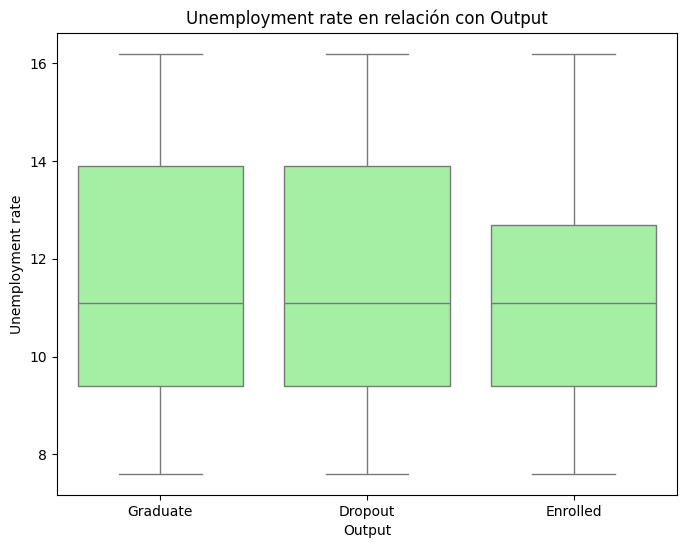

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Output', y='Unemployment rate', data=fil_d0, color='palegreen')
plt.title('Unemployment rate en relación con Output')
plt.xlabel('Output')
plt.ylabel('Unemployment rate')
plt.show()

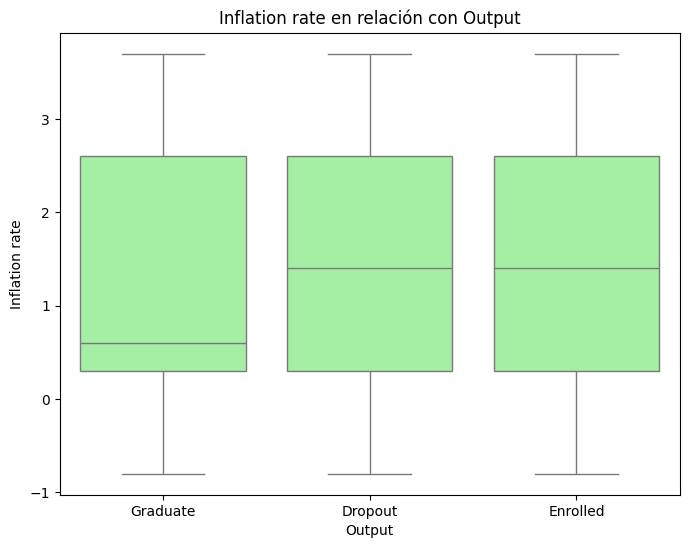

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Output', y='Inflation rate', data=fil_d0, color='palegreen')
plt.title('Inflation rate en relación con Output')
plt.xlabel('Output')
plt.ylabel('Inflation rate')
plt.show()

Respecto a las variables socioeconómicas se puede observar que no hay un cambio en la concentración de datos para los tres estados de la variable Output.

**Variables independientes que se van a usar en los modelos**

Marital status, Course, evening attendance, Mother's occupation, Father's occupation, Displaced, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, Curricular units 1st sem (enrolled), Curricular units 1st sem (approved), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (approved)

Para emplear los distintos modelos, se requiere que las variables presenten valores numéricos, por ende se va a realizar la codificación One Hot para las variables categóricas del conjunto de datos.

**Codificación One Hot**

In [ ]:
fil_d0_l = fil_d0.copy()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
import seaborn as sns

categorical_variables= ['Marital status', 'Course', 'evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Output']
fil_d0_l = pd.get_dummies(fil_d0_l, columns=categorical_variables, drop_first=False, dtype=int)

fil_d0_l.head()

,Application mode,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Tuition fees up to date_Si,Gender_Hombre,Gender_Mujer,Scholarship holder_No,Scholarship holder_Si,International_No,International_Si,Output_Dropout,Output_Enrolled,Output_Graduate
1,6,1,19,0,6,6,6,14.000000,0,0,...,0,1,0,1,0,1,0,0,0,1
2,1,5,19,0,6,0,0,0.000000,0,0,...,0,1,0,1,0,1,0,1,0,0
3,8,2,20,0,6,8,6,13.428571,0,0,...,1,0,1,1,0,1,0,0,0,1
4,12,1,45,0,6,9,5,12.333333,0,0,...,1,0,1,1,0,1,0,0,0,1
5,12,1,50,0,5,10,5,11.857143,0,0,...,1,1,0,1,0,1,0,0,0,1


**Variable objetivo**

Los modelos van a estar enfocados a la variable respuesta Output_Dropout

## Modelos

**Regresión Logística**

In [ ]:
X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

# Conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar la regresión logística multinomial
modelo_rl = LogisticRegression(solver='lbfgs', max_iter=10000)
modelo_rl.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo_rl.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

F1_score = []
F1_score2 = []
F1_score.append(f1_score_class_1)
F1_score2.append(f1_score_class_1)

F1-score de la categoría 1: 0.8056628056628057


Se realiza el proceso de iteración con forward selection, con el fin de observar si aumenta el valor de f1_score eligiendo ciertas características.

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

# Conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar lista para almacenar las características seleccionadas
selected_features = []
best_score = 0

while True:
    best_feature = None
    best_model = None
    for feature in X_train.columns:
        if feature not in selected_features:
            features_to_use = selected_features + [feature]
            # Entrenar modelo con las características seleccionadas
            model = LogisticRegression(solver='lbfgs', max_iter=10000)
            model.fit(X_train[features_to_use], y_train)
            # Evaluar el modelo
            y_pred = model.predict(X_test[features_to_use])
            score = f1_score(y_test, y_pred)
            # Actualizar la mejor característica y modelo si se encuentra un mejor ajuste
            if score > best_score:
                best_score = score
                best_feature = feature
                best_model = model
    # Si no se encuentra ninguna característica que mejore el modelo, detener el bucle
    if best_feature is None:
        break
    # Agregar la mejor característica al conjunto seleccionado
    selected_features.append(best_feature)
    #print("Feature selected:", best_feature)
    #print("F1 score:", best_score)

print("Selected features:", selected_features)

Selected features: ['Curricular units 2nd sem (approved)', 'Tuition fees up to date_No', "Father's occupation_Especialistas", "Father's occupation_Estudiante", 'Marital status_Casado', 'Course_Servicio social', 'Curricular units 1st sem (enrolled)', 'Previous qualification_Curso técnico', 'Course_Gestión', "Father's occupation_informal"]


In [ ]:
X = fil_d0_l[['Curricular units 2nd sem (approved)', 'Tuition fees up to date_No', "Father's occupation_Especialistas", "Father's occupation_Estudiante", 'Marital status_Casado', 'Course_Servicio social', 'Curricular units 1st sem (enrolled)', 'Previous qualification_Curso técnico', 'Course_Gestión', "Father's occupation_informal"]]
y = fil_d0_l['Output_Dropout']

# Conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar la regresión logística multinomial
modelo = LogisticRegression(solver='lbfgs', max_iter=10000)
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score_class_uno = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_uno)

F1-score de la categoría 1: 0.80719794344473


**Modelos Lineales Generalizados**

In [ ]:
fil_d0_d = fil_d0.copy()

In [ ]:
fil_d0_d.rename(columns={"Marital status": "Marital_status"}, inplace=True)
fil_d0_d.rename(columns={"Inflation rate": "Inflation_rate"}, inplace=True)
fil_d0_d.rename(columns={"evening attendance": "evening_attendance"}, inplace=True)
fil_d0_d.rename(columns={"Previous qualification": "Previous_qualification"}, inplace=True)
fil_d0_d.rename(columns={"Tuition fees up to date": "Tuition_fees_up_to_date"}, inplace=True)
fil_d0_d.rename(columns={"Scholarship holder": "Scholarship_holder"}, inplace=True)
fil_d0_d.rename(columns={"Age at enrollment": "Age_at_enrollment"}, inplace=True)
fil_d0_d.rename(columns={"Inflation rate": "Inflation_rate"}, inplace=True)

fil_d0_d.rename(columns={"Mother's occupation": "Mothers_occupation"}, inplace=True)
fil_d0_d.rename(columns={"Father's occupation": "Fathers_occupation"}, inplace=True)
fil_d0_d.rename(columns={"Mother's qualification": "Mothers_qualification"}, inplace=True)
fil_d0_d.rename(columns={"Father's qualification": "Fathers_qualification"}, inplace=True)

fil_d0_d.rename(columns={"Curricular units 1st sem (approved)": "Curricular_units_1st_sem_approved"}, inplace=True)
fil_d0_d.rename(columns={"Curricular units 1st sem (enrolled)": "Curricular_units_1st_sem_enrolled"}, inplace=True)

fil_d0_d.rename(columns={"Curricular units 2nd sem (approved)": "Curricular_units_2nd_sem_approved"}, inplace=True)
fil_d0_d.rename(columns={"Curricular units 2nd sem (enrolled)": "Curricular_units_2nd_sem_enrolled"}, inplace=True)

fil_d0_d.rename(columns={"Unemployment rate": "Unemployment_rate"}, inplace=True)
fil_d0_d.rename(columns={"Inflation rate": "Inflation_rate"}, inplace=True)

variables = fil_d0_d.drop(columns=["Application order","Application mode","Educational special needs","Displaced","Curricular units 2nd sem (without evaluations)","Curricular units 2nd sem (grade)","Curricular units 1st sem (credited)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (evaluations)","Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (credited)"])

In [ ]:
# Aplicar one-hot encoding
df_encoded = pd.get_dummies(variables['Output'], prefix='Output')
# Concatenar las columnas codificadas al DataFrame original
variables = pd.concat([variables, df_encoded], axis=1)

In [ ]:
gml_model=variables.drop(columns="Output")

In [ ]:
gml_model.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)
gml_model.columns

Index(['Marital_status', 'Course', 'evening_attendance',
       'Previous_qualification', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_approved',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_approved', 'Unemployment_rate',
       'Inflation_rate', 'GDP', 'Output_Dropout', 'Output_Enrolled',
       'Output_Graduate'],
      dtype='object')

Se realiza la manipulación de los datos para poder ser introducidos en el modelo gml debido a que problemas con los nombres cuando tiene espacio o comillas internas.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def forward_selection_glm(data, response, family):
    remaining = set(data.columns)
    remaining.remove(response)
    remaining.remove("Output_Enrolled")
    remaining.remove("Output_Graduate")
    selected = []
    current_score, best_new_score = float('inf'), float('inf')

    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            model = sm.formula.glm(formula=formula, family=family, data=data)
            result = model.fit()
            score = result.aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score > best_new_score:

            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score

    formula = "{} ~ {}".format(response, ' + '.join(selected))
    print(best_new_score)
    print(formula)
    model = sm.formula.glm(formula=formula, family=family, data=data)
    result = model.fit()
    return result
model = forward_selection_glm(gml_model, 'Output_Dropout', sm.families.Binomial(link=sm.families.links.Logit()))
model2 = forward_selection_glm(gml_model, 'Output_Dropout', sm.families.Binomial(link=sm.families.links.Probit()))
model3 = forward_selection_glm(gml_model, 'Output_Dropout', sm.families.Binomial(link=sm.families.links.CLogLog()))
print(model.summary())
print(model2.summary())
print(model3.summary())



2561.5846709673
Output_Dropout ~ Curricular_units_2nd_sem_approved + Curricular_units_2nd_sem_enrolled + Tuition_fees_up_to_date + Course + Age_at_enrollment + Mothers_qualification + Curricular_units_1st_sem_approved + Unemployment_rate + Previous_qualification + Gender + Scholarship_holder + Curricular_units_1st_sem_enrolled + International + Mothers_occupation + Debtor + Nacionality + evening_attendance
2573.6093098143033
Output_Dropout ~ Curricular_units_2nd_sem_approved + Curricular_units_2nd_sem_enrolled + Tuition_fees_up_to_date + Course + Age_at_enrollment + Mothers_qualification + Curricular_units_1st_sem_approved + Unemployment_rate + Previous_qualification + Scholarship_holder + Gender + Mothers_occupation + Curricular_units_1st_sem_enrolled + International + Nacionality + Debtor + evening_attendance + Fathers_qualification
2620.162975965385
Output_Dropout ~ Curricular_units_2nd_sem_approved + Curricular_units_2nd_sem_enrolled + Tuition_fees_up_to_date + Course + Age_at_enro

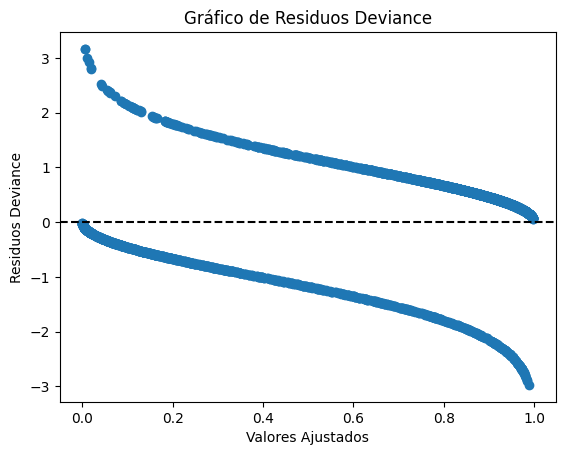

In [ ]:
residuos = model.resid_deviance

plt.scatter(model.fittedvalues, residuos)
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos Deviance")
plt.title("Gráfico de Residuos Deviance")
plt.axhline(y=0, color='k', linestyle='--')  # Línea horizontal en y=0
plt.show()

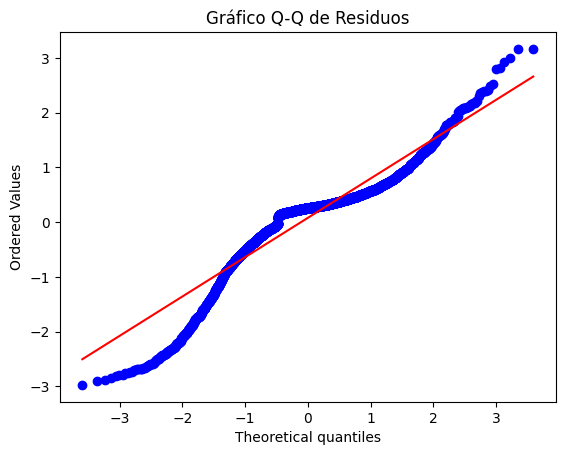

In [ ]:
from scipy.stats import probplot

probplot(residuos, plot=plt)
plt.title('Gráfico Q-Q de Residuos')
plt.show()

In [ ]:
from scipy.stats import shapiro, anderson, kstest
# Prueba de Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(residuos)
print(f"Prueba de Shapiro-Wilk: Estadístico = {shapiro_stat}, p-value = {shapiro_p}")

Prueba de Shapiro-Wilk: Estadístico = 0.8876467943191528, p-value = 0.0


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def forward_selection_glm(data, response, family):
    remaining = set(data.columns)
    remaining.remove(response)
    remaining.remove("Output_Enrolled")
    remaining.remove("Output_Dropout")
    selected = []
    current_score, best_new_score = float('inf'), float('inf')

    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            model = sm.formula.glm(formula=formula, family=family, data=data)
            result = model.fit()
            score = result.aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score > best_new_score:

            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score

    formula = "{} ~ {}".format(response, ' + '.join(selected))
    print(best_new_score)
    print(formula)
    model = sm.formula.glm(formula=formula, family=family, data=data)
    result = model.fit()
    return result
model = forward_selection_glm(gml_model, 'Output_Graduate', sm.families.Binomial(link=sm.families.links.Logit()))
model2 = forward_selection_glm(gml_model, 'Output_Graduate', sm.families.Binomial(link=sm.families.links.Probit()))
model3 = forward_selection_glm(gml_model, 'Output_Graduate', sm.families.Binomial(link=sm.families.links.CLogLog()))
print(model.summary())
print(model2.summary())
print(model3.summary())


2696.758561377493
Output_Graduate ~ Curricular_units_2nd_sem_approved + Curricular_units_2nd_sem_enrolled + Course + Tuition_fees_up_to_date + Curricular_units_1st_sem_approved + Scholarship_holder + Curricular_units_1st_sem_enrolled + Debtor + Fathers_qualification + Age_at_enrollment + Unemployment_rate + International + evening_attendance
2723.8283197275723
Output_Graduate ~ Curricular_units_2nd_sem_approved + Curricular_units_2nd_sem_enrolled + Course + Tuition_fees_up_to_date + Curricular_units_1st_sem_approved + Scholarship_holder + Curricular_units_1st_sem_enrolled + Debtor + Fathers_qualification + Age_at_enrollment + Unemployment_rate + International + evening_attendance
2839.8096444267867
Output_Graduate ~ Curricular_units_2nd_sem_approved + Curricular_units_2nd_sem_enrolled + Course + Tuition_fees_up_to_date + Curricular_units_1st_sem_approved + Scholarship_holder + Debtor + Fathers_qualification + International + evening_attendance + Nacionality
                            

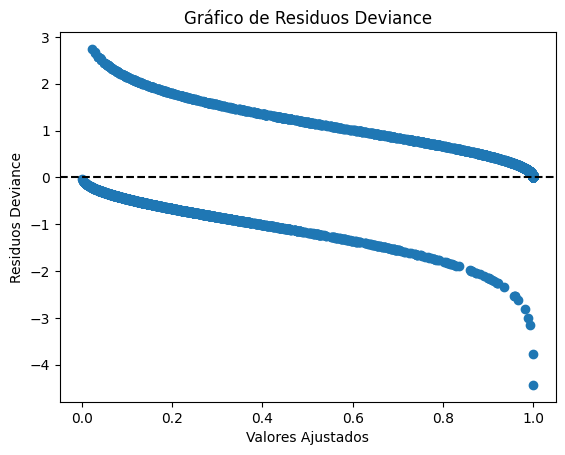

In [ ]:
residuos = model.resid_deviance

plt.scatter(model.fittedvalues, residuos)
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos Deviance")
plt.title("Gráfico de Residuos Deviance")
plt.axhline(y=0, color='k', linestyle='--')  # Línea horizontal en y=0
plt.show()

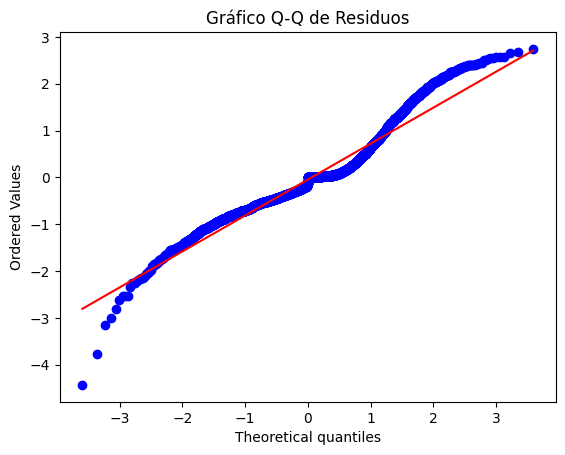

In [ ]:
from scipy.stats import probplot

probplot(residuos, plot=plt)
plt.title('Gráfico Q-Q de Residuos')
plt.show()

In [ ]:
from scipy.stats import shapiro, anderson, kstest
# Prueba de Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(residuos)
print(f"Prueba de Shapiro-Wilk: Estadístico = {shapiro_stat}, p-value = {shapiro_p}")

Prueba de Shapiro-Wilk: Estadístico = 0.9456532597541809, p-value = 5.805001081691644e-37


Al final podemos deducir que los modelos lineales no son ideales para nuestro conjuntos de datos siendo incapaces y además demasiados complejos para nuestras necesidades

**Árbol de decisión**

Es un conjunto de reglas de decisión que se utilizan para dividir los datos en subconjuntos más pequeños y homogéneos.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.8320251177394035


In [ ]:
from sklearn.metrics import f1_score
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

F1_score.append(f1_score_class_1)

F1-score de la categoría 1: 0.7396593673965935


<h2>Hiperparámetros

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Definir los hiperparámetros que deseas buscar
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterio para medir la calidad de una división
    'max_depth': [None, 10, 20, 30],   # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras requeridas para ser un nodo hoja
}

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Configurar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Precisión del modelo: 0.8712715855572999
Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
from sklearn.metrics import f1_score
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

F1_score2.append(f1_score_class_1)

F1-score de la categoría 1: 0.7902813299232737


**Random Forest**

es un algoritmo de aprendizaje supervisado utilizado tanto para tareas de clasificación como de regresión. Se basa en la construcción de múltiples árboles de decisión durante el entrenamiento y la combinación de sus predicciones para obtener un resultado final más robusto y preciso.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un clasificador RandomForest
clf = RandomForestClassifier()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.8783359497645212


In [ ]:
from sklearn.metrics import f1_score
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

#F1_score.append(f1_score_class_1)
F1_score[2]=f1_score_class_1

F1-score de la categoría 1: 0.7968545216251638


<h2> Hiperparámetros

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un clasificador de árbol de decisión
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que deseas buscar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20],       # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras requeridas para ser un nodo hoja
}

# Crear un clasificador RandomForest
clf = RandomForestClassifier()

# Configurar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Precisión del modelo: 0.8799058084772371
Mejores hiperparámetros encontrados:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
from sklearn.metrics import f1_score
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

F1_score2[2]=f1_score_class_1

F1-score de la categoría 1: 0.7984189723320159


**LightGBM**

LightGBM es una biblioteca de aprendizaje automático de código abierto desarrollada por Microsoft. Es una implementación eficiente y de alto rendimiento de algoritmos de gradient boosting tree que está diseñada para manejar grandes conjuntos de datos y entrenar modelos de manera rápida.

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un clasificador de árbol de decisión
modelo = LGBMClassifier()

# Entrenar el clasificador
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 937, number of negative: 2033
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 2970, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.315488 -> initscore=-0.774585
[LightGBM] [Info] Start training from score -0.774585
Precisión del modelo: 0.8720565149136578


In [ ]:
from sklearn.metrics import f1_score
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

F1_score.append(f1_score_class_1)

F1-score de la categoría 1: 0.7891332470892627


<h2>Hiperparámetros

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los hiperparámetros que deseas buscar
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'max_depth': [3, 5, 7],           # Profundidad máxima de cada árbol
    'learning_rate': [0.1, 0.01, 0.001],  # Tasa de aprendizaje
    'subsample': [0.8, 0.9, 1.0],     # Submuestra del conjunto de datos
    'colsample_bytree': [0.8, 0.9, 1.0]   # Submuestra de columnas al construir cada árbol
}
# Crear un clasificador LGBM
modelo = LGBMClassifier()

# Configurar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [ ]:
from sklearn.metrics import f1_score
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

F1_score2.append(f1_score_class_1)

F1-score de la categoría 1: 0.7953063885267276


<h2>CatBoost

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suponiendo que tienes un DataFrame llamado 'data' que contiene tus datos
# y la columna 'target' que representa la variable objetivo
X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo CATBoost
model = CatBoostClassifier()  # Imprimir métricas en cada 100 iteraciones

# Entrenar el modelo
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)



# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Learning rate set to 0.041465
0:	learn: 0.6565866	test: 0.6565690	best: 0.6565690 (0)	total: 2.49ms	remaining: 2.49s
1:	learn: 0.6261256	test: 0.6263345	best: 0.6263345 (1)	total: 5.24ms	remaining: 2.61s
2:	learn: 0.5965427	test: 0.5963706	best: 0.5963706 (2)	total: 8.24ms	remaining: 2.74s
3:	learn: 0.5724650	test: 0.5723471	best: 0.5723471 (3)	total: 10.8ms	remaining: 2.7s
4:	learn: 0.5495140	test: 0.5495177	best: 0.5495177 (4)	total: 13.5ms	remaining: 2.69s
5:	learn: 0.5276247	test: 0.5277296	best: 0.5277296 (5)	total: 16.2ms	remaining: 2.68s
6:	learn: 0.5087471	test: 0.5088520	best: 0.5088520 (6)	total: 18.8ms	remaining: 2.66s
7:	learn: 0.4914203	test: 0.4916227	best: 0.4916227 (7)	total: 21.3ms	remaining: 2.63s
8:	learn: 0.4772821	test: 0.4774431	best: 0.4774431 (8)	total: 23ms	remaining: 2.53s
9:	learn: 0.4644766	test: 0.4648087	best: 0.4648087 (9)	total: 25.7ms	remaining: 2.54s
10:	learn: 0.4519899	test: 0.4523964	best: 0.4523964 (10)	total: 28.2ms	remaining: 2.54s
11:	learn: 0.4

In [ ]:
from sklearn.metrics import f1_score
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

F1_score[4]=f1_score_class_1

F1-score de la categoría 1: 0.8026143790849672


<h2>Hiperparámetros

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
}

# Inicializar el modelo CatBoostClassifier
model = CatBoostClassifier(loss_function='Logloss', eval_metric='F1', random_seed=42)

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', verbose=2)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Entrenar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

print("Best parameters found:", grid_search.best_params_)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el F1 score del modelo
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
6:	learn: 0.8101933	total: 32.9ms	remaining: 4.67s
7:	learn: 0.8169014	total: 37.8ms	remaining: 4.69s
8:	learn: 0.8144876	total: 42.4ms	remaining: 4.67s
9:	learn: 0.8152078	total: 46.9ms	remaining: 4.64s
10:	learn: 0.8152078	total: 51.7ms	remaining: 4.64s
11:	learn: 0.8138298	total: 56.3ms	remaining: 4.64s
12:	learn: 0.8177778	total: 60.8ms	remaining: 4.62s
13:	learn: 0.8198758	total: 63.2ms	remaining: 4.45s
14:	learn: 0.8160000	total: 68ms	remaining: 4.47s
15:	learn: 0.8167260	total: 73.6ms	remaining: 4.53s
16:	learn: 0.8153434	total: 78.2ms	remaining: 4.52s
17:	learn: 0.8213333	total: 82.8ms	remaining: 4.52s
18:	learn: 0.8231111	total: 93.3ms	remaining: 4.82s
19:	learn: 0.8241563	total: 98.6ms	remaining: 4.83s
20:	learn: 0.8262411	total: 103ms	remaining: 4.81s
21:	learn: 0.8272808	total: 108ms	remaining: 4.78s
22:	learn: 0.8287489	total: 112ms	remaining: 4.75s
23:	learn: 0.8266667	total: 119ms	remaining: 4.82s
24:	lea

In [ ]:
from sklearn.metrics import f1_score
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

F1_score2[4]=f1_score_class_1

F1-score de la categoría 1: 0.8026143790849672


**Stacking**

 Stacked Generalization, es una técnica de ensemble learning que combina múltiples modelos de aprendizaje para mejorar la precisión de las predicciones. A diferencia de otros métodos de ensemble, como el promedio de predicciones o la votación, Stacking utiliza un metamodelo (o metalearner) para combinar las predicciones de los modelos base.

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier


# Dividir los datos en características (features) y etiquetas (labels)
X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']  # etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar los modelos base
clf1 = RandomForestClassifier(n_estimators=100, random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression(max_iter=1000)

# Inicializar el clasificador stacking
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=LogisticRegression(),
                          use_probas=True,
                          average_probas=False)

# Entrenar los modelos base y el modelo de stacking
for clf in [clf1, clf2, clf3, sclf]:
    clf.fit(X_train, y_train)

# Realizar predicciones con el clasificador stacking en el conjunto de prueba
y_pred = sclf.predict(X_test)

# Evaluar la precisión del modelo de stacking
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de stacking en el conjunto de prueba:", accuracy)


Precisión del modelo de stacking en el conjunto de prueba: 0.869701726844584


In [ ]:
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

F1_score.append(f1_score_class_1)

F1-score de la categoría 1: 0.781578947368421


<h2>Hiperparametros

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import GridSearchCV


# Dividir los datos en características (features) y etiquetas (labels)
X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']  # etiquetas

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf1 = RandomForestClassifier(n_estimators=100, random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression(max_iter=10000)

# Definir los hiperparámetros que deseas buscar
# Definir los hiperparámetros que deseas buscar
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],  # Hiperparámetros del RandomForestClassifier
    'kneighborsclassifier__n_neighbors': [3, 5, 7],            # Hiperparámetros del KNeighborsClassifier
    'logisticregression__C': [0.1, 1.0, 10.0],                # Hiperparámetros de LogisticRegression
    'meta_classifier__C': [0.1, 1.0, 10.0],                   # Hiperparámetros del meta-classifier
}

# Inicializar el clasificador stacking
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          meta_classifier=LogisticRegression(),
                          use_probas=True,
                          average_probas=False)

# Configurar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=sclf, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de stacking en el conjunto de prueba:", accuracy)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Precisión del modelo de stacking en el conjunto de prueba: 0.8728414442700158
Mejores hiperparámetros encontrados:
{'kneighborsclassifier__n_neighbors': 3, 'logisticregression__C': 10.0, 'meta_classifier__C': 0.1, 'randomforestclassifier__n_estimators': 100}


In [ ]:
f1_score_class_1 = f1_score(y_test, y_pred, pos_label=1)

print("F1-score de la categoría 1:", f1_score_class_1)

F1_score2.append(f1_score_class_1)

F1-score de la categoría 1: 0.7851458885941645


**Rendimiento de los modelos teniendo el cuenta f1_score**

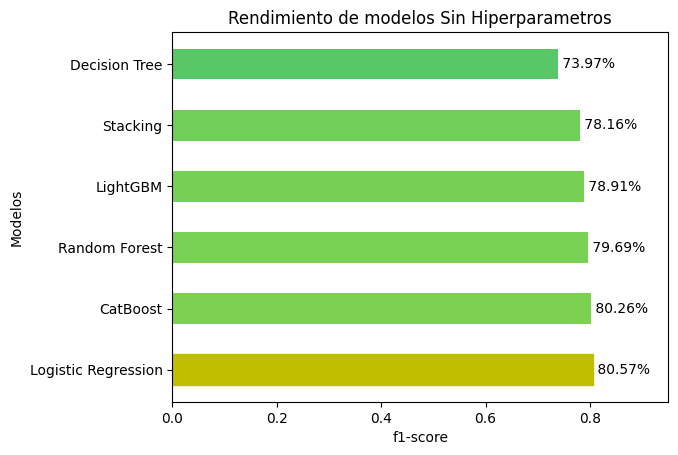

In [ ]:
modelos = ["Logistic Regression", "Decision Tree", "Random Forest", "LightGBM", "CatBoost", "Stacking"]

# Ordenar los datos de forma descendente
sorted_indices = sorted(range(len(F1_score)), key=lambda i: F1_score[i], reverse=True)
modelos_sorted = [modelos[i] for i in sorted_indices]
F1_score_sorted = [F1_score[i] for i in sorted_indices]

# Identificar la barra con la mayor puntuación
indice_max = F1_score_sorted.index(max(F1_score_sorted))

# Crear el gráfico de barras horizontal
barras = plt.barh(modelos_sorted, F1_score_sorted, height=0.5, color=plt.cm.viridis(F1_score_sorted))

# Cambiar el color de la barra con la mayor puntuación
barras[indice_max].set_color('#BFBF00')

# Agregar etiquetas y título
plt.xlabel('f1-score')
plt.ylabel('Modelos')
plt.title('Rendimiento de modelos Sin Hiperparametros')

# Agregar los valores de F1-score dentro de cada barra
for i, (value, name) in enumerate(zip(F1_score_sorted, modelos_sorted)):
    plt.text(value, i, f' {value*100:.2f}%', ha='left', va='center', color='black')

# Establecer el límite del eje x
plt.xlim(0, 0.95)

# Mostrar el gráfico
plt.show()


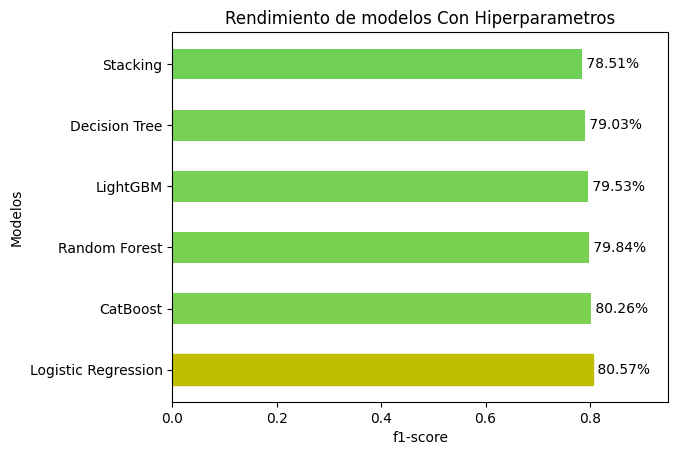

In [ ]:
import matplotlib.pyplot as plt

modelos = ["Logistic Regression", "Decision Tree", "Random Forest", "LightGBM", "CatBoost", "Stacking"]

# Ordenar los datos de forma descendente
sorted_indices = sorted(range(len(F1_score2)), key=lambda i: F1_score2[i], reverse=True)
modelos_sorted = [modelos[i] for i in sorted_indices]
F1_score_sorted = [F1_score2[i] for i in sorted_indices]

# Identificar la barra con la mayor puntuación
indice_max = F1_score_sorted.index(max(F1_score_sorted))

# Crear el gráfico de barras horizontal
barras = plt.barh(modelos_sorted, F1_score_sorted, height=0.5, color=plt.cm.viridis(F1_score_sorted))

# Cambiar el color de la barra con la mayor puntuación
barras[indice_max].set_color('#BFBF00')

# Agregar etiquetas y título
plt.xlabel('f1-score')
plt.ylabel('Modelos')
plt.title('Rendimiento de modelos Con Hiperparametros')

# Agregar los valores de F1-score dentro de cada barra
for i, (value, name) in enumerate(zip(F1_score_sorted, modelos_sorted)):
    plt.text(value, i, f' {value*100:.2f}%', ha='left', va='center', color='black')

# Establecer el límite del eje x
plt.xlim(0, 0.95)

# Mostrar el gráfico
plt.show()


##Modelo seleccionado: Regresión Logística

**- Evaluación del modelo**

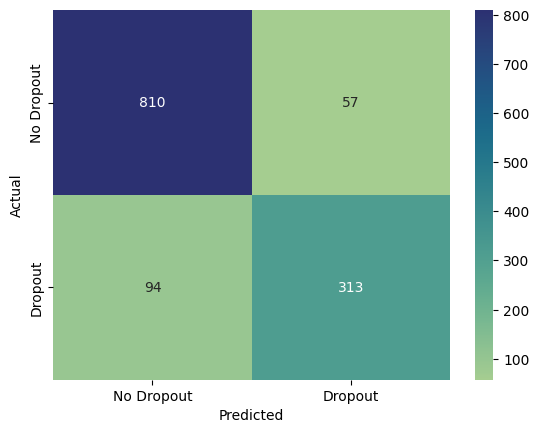

In [ ]:
X = fil_d0_l[['Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)', 'Marital status_Casado', 'Marital status_Divorciado', 'Marital status_Soltero', 'Marital status_Unión libre', 'Marital status_Viudo', 'Debtor_No', 'Debtor_Si', 'Scholarship holder_No', 'Scholarship holder_Si', 'Previous qualification_Curso técnico', 'Previous qualification_Educación secundaria', 'Previous qualification_Educación secundaria no completada', 'Previous qualification_Educación superior', "Mother's occupation_Desempleada", "Mother's occupation_Especialistas", "Mother's occupation_Estudiante", "Mother's occupation_Informales", "Mother's occupation_Profesionales", "Mother's occupation_Representantes del gobierno", "Mother's occupation_Técnicos", "Mother's occupation_trabajadores de multiples servicios", "Father's occupation_Desempleada o otra situacion", "Father's occupation_Especialistas", "Father's occupation_Estudiante", "Father's occupation_Profesional", "Father's occupation_Representantes del gobierno", "Father's occupation_Tecnico", "Father's occupation_informal", "Father's occupation_trabajadores de multiples servicios", 'Course_Agronomía', 'Course_Ciencias de la salud', 'Course_Educación', 'Course_Equinocultura', 'Course_Gestión', 'Course_Publicidad y comunicación', 'Course_Servicio social', 'Course_Tecnologías e ingeniería', 'Course_Turismo', 'Gender_Hombre', 'Gender_Mujer', 'evening attendance_Día', 'evening attendance_Noche', 'Displaced_No', 'Displaced_Si', 'Tuition fees up to date_No', 'Tuition fees up to date_Si']]
y = fil_d0_l['Output_Dropout']

# Conjunto de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar la regresión logística multinomial
modelo_rl = LogisticRegression(solver='lbfgs', max_iter=10000)
modelo_rl.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo_rl.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['No Dropout', 'Dropout'], yticklabels=['No Dropout', 'Dropout'], cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Evaluamos el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       867
           1       0.85      0.77      0.81       407

    accuracy                           0.88      1274
   macro avg       0.87      0.85      0.86      1274
weighted avg       0.88      0.88      0.88      1274



- Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Definir el F1-score como métrica de evaluación
scorer = make_scorer(f1_score, pos_label=1)

# Realizar la validación cruzada con F1-score
scores = cross_val_score(modelo_rl, X, y, cv=5, scoring=scorer)
print(scores)

[0.80885312 0.81212121 0.7831094  0.8111332  0.77799607]


- Características que tienen coeficientes positivos en el modelo (Aumentan probabilidad de categoría 1)

In [ ]:
# Obtener los coeficientes del modelo
IMP_feature = []
valores=[]
coefficients = modelo_rl.coef_[0]

# Asociar los coeficientes con los nombres de las variables
feature_importance = dict(zip(X.columns, coefficients))

# Imprimir la importancia de las variables
print("Importancia de las variables:")
count=0
porcentaje=[]
for feature, importance in sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True):
    if importance > 0:
      IMP_feature.append(feature)
      valores.append(importance)
      count=+ importance
      print(f"{feature}: {importance}")
total=0
for i in valores:
    total=i/count
    porcentaje.append(total)

Importancia de las variables:
Tuition fees up to date_No: 1.2464355438078016
Father's occupation_Desempleada o otra situacion: 1.054035014522683
Mother's occupation_Estudiante: 0.992992372431884
Course_Educación: 0.939760821542046
Previous qualification_Educación superior: 0.7547567007293045
Course_Equinocultura: 0.7433997315369348
Curricular units 2nd sem (enrolled): 0.667545539417163
Mother's occupation_Desempleada: 0.3222303387104267
Marital status_Casado: 0.27032651303619815
Marital status_Soltero: 0.26857091423405843
Course_Turismo: 0.18468338835918485
Debtor_Si: 0.18208491628406015
Course_Publicidad y comunicación: 0.17489873069035272
Previous qualification_Educación secundaria no completada: 0.17139445602368986
Gender_Hombre: 0.16121941911483098
Displaced_Si: 0.1448770410586636
evening attendance_Noche: 0.13174572949908667
Father's occupation_Tecnico: 0.12375598634302751
Curricular units 1st sem (enrolled): 0.12278847880033046
Course_Gestión: 0.12050786144383921
Scholarship hold

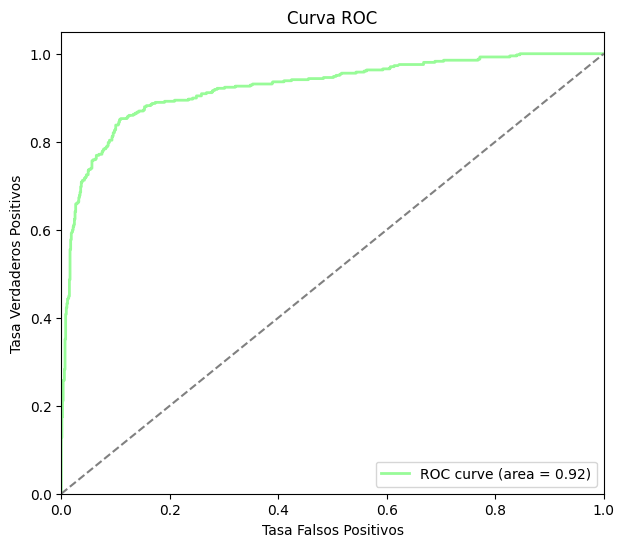

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Predecir probabilidades
y_probs = modelo_rl.predict_proba(X_test[X.columns])[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='palegreen', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa Falsos Positivos')
plt.ylabel('Tasa Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

De acuerdo con la gráfica anterior, se puede observar un buen rendimiento global del modelo al tenerse un AUC de 0.92, por otro lado, la curva se encuentra cercana al punto superior izquierdo, lo cual implica que existe una alta sensibilidad y una baja tasa de falsos positivos.

**- Resultado: Características que aumentan la probabilidad de deserción estudiantil**

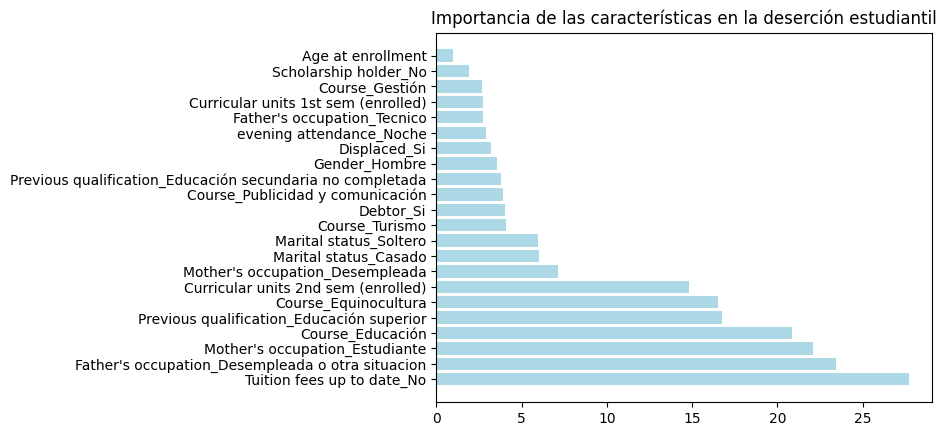

In [ ]:
import matplotlib.pyplot as plt

# Listas de valores y etiquetas
valores = [10, 20, 30, 40, 50]
etiquetas = ['A', 'B', 'C', 'D', 'E']

# Rango de posiciones para las barras
posiciones = range(len(IMP_feature))

# Crear la gráfica de barras horizontales
plt.barh(posiciones, porcentaje, color='lightblue')

# Etiquetas de las barras
plt.yticks(posiciones, IMP_feature)


# Título
plt.title('Importancia de las características en la deserción estudiantil')

# Mostrar la gráfica
plt.show()


**- Clasificación de riesgo de acuerdo a características**

In [ ]:
riesgo=fil_d0_l.copy()
def Tuition_fees_up_to_date_No(var):
    return porcentaje[0]/100 if var==1 else 0

def Father_situacion(var_d):
    return porcentaje[1]/100 if var_d==1 else 0

def Mother_occupation_Estudiante(var_d):
    return porcentaje[2]/100 if var_d==1 else 0

def Course_Educacion(var_d):
    return porcentaje[3]/100 if var_d==1 else 0

def Previous_qualification_Educacion_superior(var_d):
    return porcentaje[4]/100 if var_d==1 else 0

def Course_Equinocultura(var_d):
    return porcentaje[5]/100 if var_d==1 else 0

def Curricular_enrolled(var_d):
    return porcentaje[6]/100 if var_d==1 else 0

def Mother_Desempleada(var_d):
    return porcentaje[7]/100 if var_d==1 else 0

def Marital_status_Casado(var_d):
    return porcentaje[8]/100 if var_d==1 else 0

def Marital_status_Soltero(var_d):
    return porcentaje[9]/100 if var_d==1 else 0

def Course_Turismo(var_d):
    return porcentaje[10]/100 if var_d==1 else 0

def Debtor_Si(var_d):
    return porcentaje[11]/100 if var_d==1 else 0

def Course_Publicidadycomunicacion(var_d):
    return porcentaje[12]/100 if var_d==1 else 0

def Previousqualification_Educacionsecundarianocompletada(var_d):
    return porcentaje[13]/100 if var_d==1 else 0

def Gender_Hombre(var_d):
    return porcentaje[14]/100 if var_d==1 else 0

def Displaced_Si(var_d):
    return porcentaje[15]/100 if var_d==1 else 0

def eveningattendance_Noche(var_d):
    return porcentaje[16]/100 if var_d==1 else 0

def Fatheroccupation_Tecnico(var_d):
    return porcentaje[17]/100 if var_d==1 else 0

def Curricularunits1stenrolled(var_d):
    return porcentaje[18]/100 if var_d==1 else 0

def Course_Gestion(var_d):
    return porcentaje[19]/100 if var_d==1 else 0

def Scholarshipholder_No(var_d):
    return porcentaje[20]/100 if var_d==1 else 0

def Age_at_enrollment(var_d):
    return porcentaje[21]/100 if var_d==1 else 0

riesgo['Tuition fees up to date_No']=riesgo['Tuition fees up to date_No'].apply(Tuition_fees_up_to_date_No)

riesgo["Father's occupation_Desempleada o otra situacion"]=riesgo["Father's occupation_Desempleada o otra situacion"].apply(Father_situacion)

riesgo["Mother's occupation_Estudiante"]=riesgo["Mother's occupation_Estudiante"].apply(Mother_occupation_Estudiante)

riesgo["Course_Educación"]=riesgo["Course_Educación"].apply(Course_Educacion)

riesgo["Gender_Hombre"]=riesgo["Gender_Hombre"].apply(Gender_Hombre)

riesgo["Previous qualification_Educación superior"]=riesgo["Previous qualification_Educación superior"].apply(Previous_qualification_Educacion_superior)


riesgo["Course_Equinocultura"]=riesgo["Course_Equinocultura"].apply(Course_Equinocultura)


riesgo["Curricular units 2nd sem (enrolled)"]=riesgo["Curricular units 2nd sem (enrolled)"].apply(Curricular_enrolled)


riesgo["Mother's occupation_Desempleada"]=riesgo["Mother's occupation_Desempleada"].apply(Mother_Desempleada)


riesgo["Marital status_Casado"]=riesgo["Marital status_Casado"].apply(Marital_status_Casado)

riesgo["Marital status_Soltero"]=riesgo["Marital status_Soltero"].apply(Marital_status_Soltero)

riesgo["Course_Turismo"]=riesgo["Course_Turismo"].apply(Course_Turismo)

riesgo["Debtor_Si"]=riesgo["Debtor_Si"].apply(Debtor_Si)


riesgo["Course_Publicidad y comunicación"]=riesgo["Course_Publicidad y comunicación"].apply(Course_Publicidadycomunicacion)

riesgo["Previous qualification_Educación secundaria no completada"]=riesgo["Previous qualification_Educación secundaria no completada"].apply(Previousqualification_Educacionsecundarianocompletada)

riesgo["Displaced_Si"]=riesgo["Displaced_Si"].apply(Displaced_Si)


riesgo["evening attendance_Noche"]=riesgo["evening attendance_Noche"].apply(eveningattendance_Noche)

riesgo["Father's occupation_Tecnico"]=riesgo["Father's occupation_Tecnico"].apply(Fatheroccupation_Tecnico)

riesgo["Curricular units 1st sem (enrolled)"]=riesgo["Curricular units 1st sem (enrolled)"].apply(Curricularunits1stenrolled)

riesgo["Course_Gestión"]=riesgo["Course_Gestión"].apply(Course_Gestion)

riesgo["Scholarship holder_No"]=riesgo["Scholarship holder_No"].apply(Scholarshipholder_No)

riesgo["Age at enrollment"]=riesgo["Age at enrollment"].apply(Age_at_enrollment)





riesgo['Riesgo'] = riesgo.apply(lambda row: sum(row[IMP_feature]), axis=1)
riesgo.head(10)

,Application mode,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Gender_Hombre,Gender_Mujer,Scholarship holder_No,Scholarship holder_Si,International_No,International_Si,Output_Dropout,Output_Enrolled,Output_Graduate,Riesgo
1,6,1,0,0,0.0,6,6,14.000000,0,0,...,0.035813,0,0.019396,0,1,0,0,0,1,0.492442
2,1,5,0,0,0.0,0,0,0.000000,0,0,...,0.035813,0,0.019396,0,1,0,1,0,0,0.462778
3,8,2,0,0,0.0,8,6,13.428571,0,0,...,0.000000,1,0.019396,0,1,0,0,0,1,0.177579
4,12,1,0,0,0.0,9,5,12.333333,0,0,...,0.000000,1,0.019396,0,1,0,0,0,1,0.108710
5,12,1,0,0,0.0,10,5,11.857143,0,0,...,0.035813,0,0.019396,0,1,0,0,0,1,0.211739
6,1,1,0,0,0.0,9,7,13.300000,0,0,...,0.000000,1,0.000000,1,1,0,0,0,1,0.091841
7,9,4,0,0,0.0,5,0,0.000000,0,0,...,0.035813,0,0.019396,0,1,0,1,0,0,0.464952
8,1,3,0,0,0.0,8,6,13.875000,0,0,...,0.000000,1,0.000000,1,0,1,0,0,1,0.059659
9,1,1,0,0,0.0,9,5,11.400000,0,0,...,0.000000,1,0.019396,0,1,0,1,0,0,0.428562
10,1,1,0,0,0.0,6,6,12.333333,0,0,...,0.000000,1,0.019396,0,1,0,0,0,1,0.150088


In [ ]:
lrl=riesgo.copy()
def riesgo_0(var_d):
    if var_d < 0.20 :
       return "poco probable"
    if 0.40 > var_d > 0.21:
       return "bajo riesgo"
    if 0.41 < var_d < 0.60:
       return "medio riesgo"
    if 0.61 < var_d < 0.80:
       return "alto riesgo"
    if 0.81 < var_d :
       return "Abandono"

lrl["Riesgo"]=lrl["Riesgo"].apply(riesgo_0)
lrl.head(100)

,Application mode,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),...,Gender_Hombre,Gender_Mujer,Scholarship holder_No,Scholarship holder_Si,International_No,International_Si,Output_Dropout,Output_Enrolled,Output_Graduate,Riesgo
1,6,1,0,0,0.0,6,6,14.000000,0,0,...,0.035813,0,0.019396,0,1,0,0,0,1,medio riesgo
2,1,5,0,0,0.0,0,0,0.000000,0,0,...,0.035813,0,0.019396,0,1,0,1,0,0,medio riesgo
3,8,2,0,0,0.0,8,6,13.428571,0,0,...,0.000000,1,0.019396,0,1,0,0,0,1,poco probable
4,12,1,0,0,0.0,9,5,12.333333,0,0,...,0.000000,1,0.019396,0,1,0,0,0,1,poco probable
5,12,1,0,0,0.0,10,5,11.857143,0,0,...,0.035813,0,0.019396,0,1,0,0,0,1,bajo riesgo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,12,1,0,0,0.0,0,0,0.000000,0,0,...,0.000000,1,0.019396,0,1,0,1,0,0,poco probable
103,12,1,0,13,0.0,19,18,14.631579,0,10,...,0.000000,1,0.019396,0,1,0,0,0,1,poco probable
104,9,1,0,0,0.0,0,0,0.000000,0,0,...,0.000000,1,0.019396,0,1,0,1,0,0,bajo riesgo
105,16,1,0,4,0.0,12,10,13.000000,0,5,...,0.000000,1,0.019396,0,1,0,0,0,1,poco probable


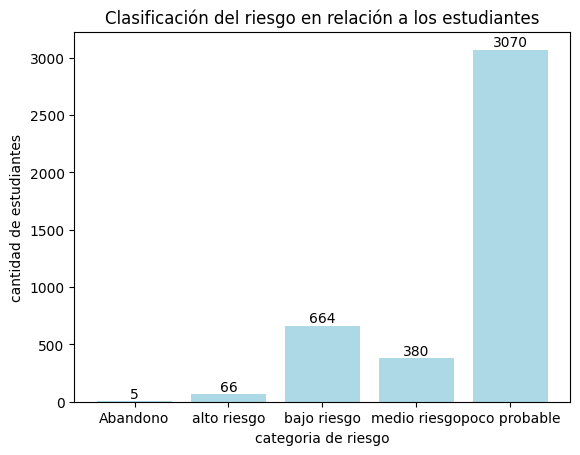

In [ ]:
import matplotlib.pyplot as plt

# Calcular la frecuencia de cada valor en la columna 'Riesgo'
frecuencia = lrl['Riesgo'].value_counts()

# Ordenar los valores y las frecuencias
frecuencia = frecuencia.sort_index()

# Crear el gráfico de barras
figure = plt.bar(frecuencia.index, frecuencia.values, color='lightblue')

# Mostrar el valor de la frecuencia encima de cada barra
for bar in figure:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('categoria de riesgo')
plt.ylabel('cantidad de estudiantes')
plt.title('Clasificación del riesgo en relación a los estudiantes')
plt.show()


